In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA


Mounted at /content/drive
/content/drive/MyDrive/TA


Mounted at /content/drive
/content/drive/MyDrive/TA
Data berhasil digabung dan disimpan sebagai df_gabungan.csv!
Jumlah data seizure dan tidak seizure:
seizure
kejang          1403520
tidak kejang    1403520
Name: count, dtype: int64


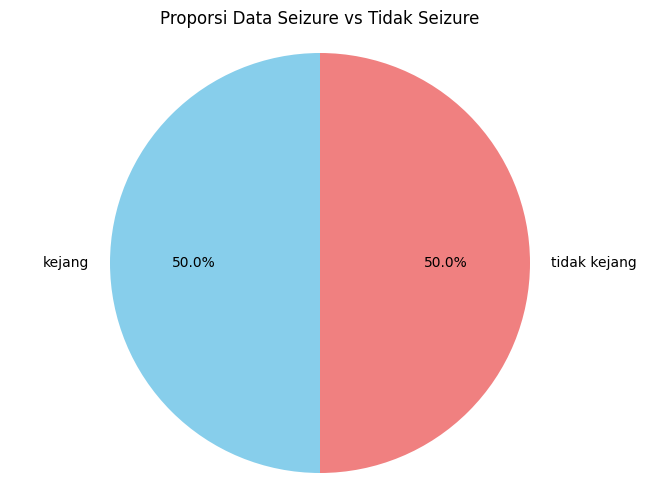

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Menyimpan kembali data gabungan ke file CSV
TA_gabungan = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")

print("Data berhasil digabung dan disimpan sebagai df_gabungan.csv!")

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = TA_gabungan['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

# TUNNING PARAMETER GRID SEARCH CV

## chb09_08

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Mounted at /content/drive
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 1.0
Testing Accuracy : 0.9703337453646477
Confusion Matrix:
 [[1967   56]
 [  64 1958]]

Fold 2
Training Accuracy: 1.0
Testing Accuracy : 0.9666254635352287
Confusion Matrix:
 [[1971   52]
 [  83 1939]]

Fold 3
Training Accuracy: 1.0
Testing Accuracy : 0.9651421508034611
Confusion Matrix:
 [[1964   58]
 [  83 1940]]

Fold 4
Training Accuracy: 1.0
Testing Accuracy : 0.9725587144622991
Confusion Matrix:
 [[1983   39]
 [  72 1951]]

Fold 5
Training Accuracy: 1.0
Testing Accuracy : 0.9671117705242335
Confusion Matrix:
 [[1975   47]
 [  86 1936]]

Average Training Accuracy: 1.0
Average Testing Accuracy : 0.9683543689379741


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,  # Diubah dari 3 ke 5
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9901106372458125
Testing Accuracy : 0.9777503090234858
Confusion Matrix:
 [[1968   55]
 [  35 1987]]

Fold 2
Training Accuracy: 0.9899252116941715
Testing Accuracy : 0.9740420271940667
Confusion Matrix:
 [[1972   51]
 [  54 1968]]

Fold 3
Training Accuracy: 0.9900488287285988
Testing Accuracy : 0.9784919653893696
Confusion Matrix:
 [[1978   44]
 [  43 1980]]

Fold 4
Training Accuracy: 0.9909141479695902
Testing Accuracy : 0.980469715698393
Confusion Matrix:
 [[1985   37]
 [  42 1981]]

Fold 5
Training Accuracy: 0.9900494437577256
Testing Accuracy : 0.972057368941642
Confusion Matrix:
 [[1972   50]
 [  63 1959]]

Average Training Accuracy: 0.9902096538791797
Average Testing Ac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9906669139007355
Testing Accuracy : 0.9775030902348578
Confusion Matrix:
 [[1971   52]
 [  39 1983]]

Fold 2
Training Accuracy: 0.9910995735212312
Testing Accuracy : 0.9745364647713226
Confusion Matrix:
 [[1975   48]
 [  55 1967]]

Fold 3
Training Accuracy: 0.9901724457630261
Testing Accuracy : 0.9799752781211372
Confusion Matrix:
 [[1984   38]
 [  43 1980]]

Fold 4
Training Accuracy: 0.9910377650040175
Testing Accuracy : 0.9802224969097652
Confusion Matrix:
 [[1986   36]
 [  44 1979]]

Fold 5
Training Accuracy: 0.9906056860321384
Testing Accuracy : 0.9725519287833828
Confusion Matrix:
 [[1975   47]
 [  64 1958]]

Average Training Accuracy: 0.9907164768442298
Average Testing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Mounted at /content/drive
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 1.0
Testing Accuracy : 0.9819530284301607
Confusion Matrix:
 [[1988   35]
 [  38 1984]]

Fold 2
Training Accuracy: 1.0
Testing Accuracy : 0.9784919653893696
Confusion Matrix:
 [[1985   38]
 [  49 1973]]

Fold 3
Training Accuracy: 1.0
Testing Accuracy : 0.9836835599505562
Confusion Matrix:
 [[1994   28]
 [  38 1985]]

Fold 4
Training Accuracy: 1.0
Testing Accuracy : 0.9824474660074166
Confusion Matrix:
 [[1994   28]
 [  43 1980]]

Fold 5
Training Accuracy: 1.0
Testing Accuracy : 0.9752720079129574
Confusion Matrix:
 [[1991   31]
 [  69 1953]]

Average Training Accuracy: 1.0
Average Testing Accuracy : 0.9803696055380922


## chb05_22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb05_22.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Fold 1
Training Accuracy: 0.9924877926630775
Testing Accuracy : 0.9539308963445168
Confusion Matrix:
 [[2878  118]
 [ 158 2837]]

Fold 2
Training Accuracy: 0.992320854722257
Testing Accuracy : 0.9544316474712068
Confusion Matrix:
 [[2883  112]
 [ 161 2835]]

Fold 3
Training Accuracy: 0.9924881061680995
Testing Accuracy : 0.9502504173622704
Confusion Matrix:
 [[2854  141]
 [ 157 2838]]

Fold 4
Training Accuracy: 0.9925298389116101
Testing Accuracy : 0.9512520868113522
Confusion Matrix:
 [[2868  127]
 [ 165 2830]]

Fold 5
Training Accuracy: 0.9926967698856523
Testing Accuracy : 0.9582637729549248
Confusion Matrix:
 [[2895  100]
 [ 150 2845]]

Average Training Accuracy: 0.9925046724701392
Average Testing A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT HANNING DONE/chb05_22.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9970785860356413
Testing Accuracy : 0.9601068269070272
Confusion Matrix:
 [[2902   94]
 [ 145 2850]]

Fold 2
Training Accuracy: 0.9967029756687952
Testing Accuracy : 0.9617759973293273
Confusion Matrix:
 [[2903   92]
 [ 137 2859]]

Fold 3
Training Accuracy: 0.9964944495451131
Testing Accuracy : 0.9542570951585977
Confusion Matrix:
 [[2871  124]
 [ 150 2845]]

Fold 4
Training Accuracy: 0.9966196477756448
Testing Accuracy : 0.9560934891485809
Confusion Matrix:
 [[2887  108]
 [ 155 2840]]

Fold 5
Training Accuracy: 0.996786578749687
Testing Accuracy : 0.9616026711185309
Confusion Matrix:
 [[2909   86]
 [ 144 2851]]

Average Training Accuracy: 0.9967364475549761
Average Testing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT HAMMING DONE/chb05_22.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Mounted at /content/drive
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9997913275739744
Testing Accuracy : 0.956100817893507
Confusion Matrix:
 [[2885  111]
 [ 152 2843]]

Fold 2
Training Accuracy: 0.9998330620591795
Testing Accuracy : 0.958604573526957
Confusion Matrix:
 [[2897   98]
 [ 150 2846]]

Fold 3
Training Accuracy: 0.9998748017694683
Testing Accuracy : 0.951085141903172
Confusion Matrix:
 [[2862  133]
 [ 160 2835]]

Fold 4
Training Accuracy: 0.9998748017694683
Testing Accuracy : 0.9570951585976628
Confusion Matrix:
 [[2888  107]
 [ 150 2845]]

Fold 5
Training Accuracy: 0.9998330690259578
Testing Accuracy : 0.9614357262103506
Confusion Matrix:
 [[2903   92]
 [ 139 2856]]

Average Training Accuracy: 0.9998414124396098
Average Testing Accuracy : 0.9568642836263299


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb05_22.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9624806978005926
Testing Accuracy : 0.9495910532465365
Confusion Matrix:
 [[2879  117]
 [ 185 2810]]

Fold 2
Training Accuracy: 0.9631067150786695
Testing Accuracy : 0.9512602236688366
Confusion Matrix:
 [[2888  107]
 [ 185 2811]]

Fold 3
Training Accuracy: 0.9631082547366664
Testing Accuracy : 0.94440734557596
Confusion Matrix:
 [[2854  141]
 [ 192 2803]]

Fold 4
Training Accuracy: 0.9645689007595359
Testing Accuracy : 0.9499165275459098
Confusion Matrix:
 [[2870  125]
 [ 175 2820]]

Fold 5
Training Accuracy: 0.9637342458893248
Testing Accuracy : 0.9514190317195326
Confusion Matrix:
 [[2886  109]
 [ 182 2813]]

Average Training Accuracy: 0.9633997628529578
Average Testing A

## chb06_01

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb06_01 (rectangular).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9961632368329264
Testing Accuracy : 0.9065550906555091
Confusion Matrix:
 [[333  26]
 [ 41 317]]

Fold 2
Training Accuracy: 0.9947680502267178
Testing Accuracy : 0.8772663877266388
Confusion Matrix:
 [[316  43]
 [ 45 313]]

Fold 3
Training Accuracy: 0.9958144401813742
Testing Accuracy : 0.8940027894002789
Confusion Matrix:
 [[328  30]
 [ 46 313]]

Fold 4
Training Accuracy: 0.99511684687827
Testing Accuracy : 0.9037656903765691
Confusion Matrix:
 [[318  40]
 [ 29 330]]

Fold 5
Training Accuracy: 0.9975592747559274
Testing Accuracy : 0.8910614525139665
Confusion Matrix:
 [[314  44]
 [ 34 324]]

Average Training Accuracy: 0.9958843697750431
Average Testing Accuracy : 0.8945302821345924


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb06_01 (hamming).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 1.0
Testing Accuracy : 0.8856345885634589
Confusion Matrix:
 [[325  34]
 [ 48 310]]

Fold 2
Training Accuracy: 1.0
Testing Accuracy : 0.8675034867503487
Confusion Matrix:
 [[313  46]
 [ 49 309]]

Fold 3
Training Accuracy: 1.0
Testing Accuracy : 0.8814504881450488
Confusion Matrix:
 [[313  45]
 [ 40 319]]

Fold 4
Training Accuracy: 1.0
Testing Accuracy : 0.8800557880055788
Confusion Matrix:
 [[310  48]
 [ 38 321]]

Fold 5
Training Accuracy: 1.0
Testing Accuracy : 0.8868715083798883
Confusion Matrix:
 [[311  47]
 [ 34 324]]

Average Training Accuracy: 1.0
Average Testing Accuracy : 0.8803031719688648


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb06_01 (hanning).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9961632368329264
Testing Accuracy : 0.8814504881450488
Confusion Matrix:
 [[325  34]
 [ 51 307]]

Fold 2
Training Accuracy: 0.9947680502267178
Testing Accuracy : 0.8716875871687587
Confusion Matrix:
 [[309  50]
 [ 42 316]]

Fold 3
Training Accuracy: 0.9961632368329264
Testing Accuracy : 0.8926080892608089
Confusion Matrix:
 [[320  38]
 [ 39 320]]

Fold 4
Training Accuracy: 0.9954656435298221
Testing Accuracy : 0.8702928870292888
Confusion Matrix:
 [[299  59]
 [ 34 325]]

Fold 5
Training Accuracy: 0.9965132496513249
Testing Accuracy : 0.8798882681564246
Confusion Matrix:
 [[311  47]
 [ 39 319]]

Average Training Accuracy: 0.9958146834147434
Average Testing Accuracy : 0.879185463952066


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb06_01 (blackman).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Fold 1
Training Accuracy: 1.0
Testing Accuracy : 0.8828451882845189
Confusion Matrix:
 [[321  38]
 [ 46 312]]

Fold 2
Training Accuracy: 1.0
Testing Accuracy : 0.8716875871687587
Confusion Matrix:
 [[309  50]
 [ 42 316]]

Fold 3
Training Accuracy: 1.0
Testing Accuracy : 0.8884239888423989
Confusion Matrix:
 [[313  45]
 [ 35 324]]

Fold 4
Training Accuracy: 1.0
Testing Accuracy : 0.8926080892608089
Confusion Matrix:
 [[316  42]
 [ 35 324]]

Fold 5
Training Accuracy: 1.0
Testing Accuracy : 0.8896648044692738
Confusion Matrix:
 [[319  39]
 [ 40 318]]

Average Training Accuracy: 1.0
Average Testing Accuracy : 0.8850459316051518


## chb16_11

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_11 (rectangular).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9978296256104178
Testing Accuracy : 0.9262472885032538
Confusion Matrix:
 [[209  22]
 [ 12 218]]

Fold 2
Training Accuracy: 0.9978296256104178
Testing Accuracy : 0.913232104121475
Confusion Matrix:
 [[203  28]
 [ 12 218]]

Fold 3
Training Accuracy: 0.9967444384156267
Testing Accuracy : 0.9088937093275488
Confusion Matrix:
 [[205  25]
 [ 17 214]]

Fold 4
Training Accuracy: 0.9994574064026045
Testing Accuracy : 0.9175704989154013
Confusion Matrix:
 [[208  22]
 [ 16 215]]

Fold 5
Training Accuracy: 0.9978308026030369
Testing Accuracy : 0.9239130434782609
Confusion Matrix:
 [[210  20]
 [ 15 215]]

Average Training Accuracy: 0.9979383797284207
Average Testing Accuracy : 0.9179713288691881


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_11 (hanning).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Fold 1
Training Accuracy: 1.0
Testing Accuracy : 0.9175704989154013
Confusion Matrix:
 [[211  20]
 [ 18 212]]

Fold 2
Training Accuracy: 1.0
Testing Accuracy : 0.9045553145336226
Confusion Matrix:
 [[201  30]
 [ 14 216]]

Fold 3
Training Accuracy: 1.0
Testing Accuracy : 0.9197396963123644
Confusion Matrix:
 [[207  23]
 [ 14 217]]

Fold 4
Training Accuracy: 1.0
Testing Accuracy : 0.93058568329718
Confusion Matrix:
 [[208  22]
 [ 10 221]]

Fold 5
Training Accuracy: 1.0
Testing Accuracy : 0.9282608695652174
Confusion Matrix:
 [[211  19]
 [ 14 216]]

Average Training Accuracy: 1.0
Average Testing Accuracy : 0.9201424125247571


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_11 (hamming).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.984264785675529
Testing Accuracy : 0.9262472885032538
Confusion Matrix:
 [[213  18]
 [ 16 214]]

Fold 2
Training Accuracy: 0.9853499728703201
Testing Accuracy : 0.9023861171366594
Confusion Matrix:
 [[199  32]
 [ 13 217]]

Fold 3
Training Accuracy: 0.9837221920781335
Testing Accuracy : 0.9175704989154013
Confusion Matrix:
 [[206  24]
 [ 14 217]]

Fold 4
Training Accuracy: 0.984264785675529
Testing Accuracy : 0.9240780911062907
Confusion Matrix:
 [[211  19]
 [ 16 215]]

Fold 5
Training Accuracy: 0.9848156182212582
Testing Accuracy : 0.9173913043478261
Confusion Matrix:
 [[209  21]
 [ 17 213]]

Average Training Accuracy: 0.9844834709041541
Average Testing Accuracy : 0.9175346600018862


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_11 (blackman).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 1.0
Testing Accuracy : 0.9262472885032538
Confusion Matrix:
 [[211  20]
 [ 14 216]]

Fold 2
Training Accuracy: 1.0
Testing Accuracy : 0.9045553145336226
Confusion Matrix:
 [[200  31]
 [ 13 217]]

Fold 3
Training Accuracy: 1.0
Testing Accuracy : 0.8915401301518439
Confusion Matrix:
 [[199  31]
 [ 19 212]]

Fold 4
Training Accuracy: 1.0
Testing Accuracy : 0.911062906724512
Confusion Matrix:
 [[203  27]
 [ 14 217]]

Fold 5
Training Accuracy: 1.0
Testing Accuracy : 0.9239130434782609
Confusion Matrix:
 [[210  20]
 [ 15 215]]

Average Training Accuracy: 1.0
Average Testing Accuracy : 0.9114637366782986


## chb16_16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb16_16.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Fold 1
Training Accuracy: 1.0
Testing Accuracy : 0.935064935064935
Confusion Matrix:
 [[144  10]
 [ 10 144]]

Fold 2
Training Accuracy: 1.0
Testing Accuracy : 0.9218241042345277
Confusion Matrix:
 [[145   9]
 [ 15 138]]

Fold 3
Training Accuracy: 1.0
Testing Accuracy : 0.9055374592833876
Confusion Matrix:
 [[133  21]
 [  8 145]]

Fold 4
Training Accuracy: 1.0
Testing Accuracy : 0.9185667752442996
Confusion Matrix:
 [[144   9]
 [ 16 138]]

Fold 5
Training Accuracy: 1.0
Testing Accuracy : 0.9055374592833876
Confusion Matrix:
 [[138  15]
 [ 14 140]]

Average Training Accuracy: 1.0
Average Testing Accuracy : 0.9173061466221075


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_16 (rectangular).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Fold 1
Training Accuracy: 0.9869706840390879
Testing Accuracy : 0.9318181818181818
Confusion Matrix:
 [[142  12]
 [  9 145]]

Fold 2
Training Accuracy: 0.9918633034987795
Testing Accuracy : 0.9218241042345277
Confusion Matrix:
 [[144  10]
 [ 14 139]]

Fold 3
Training Accuracy: 0.9926769731489016
Testing Accuracy : 0.9022801302931596
Confusion Matrix:
 [[133  21]
 [  9 144]]

Fold 4
Training Accuracy: 0.9934906427990235
Testing Accuracy : 0.9087947882736156
Confusion Matrix:
 [[142  11]
 [ 17 137]]

Fold 5
Training Accuracy: 0.9902359641985354
Testing Accuracy : 0.9055374592833876
Confusion Matrix:
 [[136  17]
 [ 12 142]]

Average Training Accuracy: 0.9910475135368655
Average Testing Accuracy : 0.9140509327805745


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_16 (hamming).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.995928338762215
Testing Accuracy : 0.9285714285714286
Confusion Matrix:
 [[142  12]
 [ 10 144]]

Fold 2
Training Accuracy: 0.9975589910496339
Testing Accuracy : 0.9153094462540716
Confusion Matrix:
 [[142  12]
 [ 14 139]]

Fold 3
Training Accuracy: 0.9991863303498779
Testing Accuracy : 0.9250814332247557
Confusion Matrix:
 [[141  13]
 [ 10 143]]

Fold 4
Training Accuracy: 0.9959316517493898
Testing Accuracy : 0.9381107491856677
Confusion Matrix:
 [[146   7]
 [ 12 142]]

Fold 5
Training Accuracy: 0.9943043124491456
Testing Accuracy : 0.9087947882736156
Confusion Matrix:
 [[133  20]
 [  8 146]]

Average Training Accuracy: 0.9965819248720524
Average Testing Accuracy : 0.9231735691019078


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_16 (hanning).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.995114006514658
Testing Accuracy : 0.9253246753246753
Confusion Matrix:
 [[142  12]
 [ 11 143]]

Fold 2
Training Accuracy: 0.9951179820992677
Testing Accuracy : 0.9087947882736156
Confusion Matrix:
 [[140  14]
 [ 14 139]]

Fold 3
Training Accuracy: 0.9959316517493898
Testing Accuracy : 0.9120521172638436
Confusion Matrix:
 [[140  14]
 [ 13 140]]

Fold 4
Training Accuracy: 0.9943043124491456
Testing Accuracy : 0.9185667752442996
Confusion Matrix:
 [[143  10]
 [ 15 139]]

Fold 5
Training Accuracy: 0.9959316517493898
Testing Accuracy : 0.9022801302931596
Confusion Matrix:
 [[135  18]
 [ 12 142]]

Average Training Accuracy: 0.9952799209123702
Average Testing Accuracy : 0.9134036972799187


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb16_16 (blackman).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9780130293159609
Testing Accuracy : 0.935064935064935
Confusion Matrix:
 [[147   7]
 [ 13 141]]

Fold 2
Training Accuracy: 0.9812855980471928
Testing Accuracy : 0.9543973941368078
Confusion Matrix:
 [[146   8]
 [  6 147]]

Fold 3
Training Accuracy: 0.9845402766476811
Testing Accuracy : 0.9120521172638436
Confusion Matrix:
 [[139  15]
 [ 12 141]]

Fold 4
Training Accuracy: 0.9788445890968267
Testing Accuracy : 0.9413680781758957
Confusion Matrix:
 [[146   7]
 [ 11 143]]

Fold 5
Training Accuracy: 0.9772172497965825
Testing Accuracy : 0.9153094462540716
Confusion Matrix:
 [[138  15]
 [ 11 143]]

Average Training Accuracy: 0.9799801485808487
Average Testing Accuracy : 0.9316383941791108


## chb08_21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb08_21 (rectangular).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/TA'
/content
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9846486766419442
Testing Accuracy : 0.9069320115410224
Confusion Matrix:
 [[6154  605]
 [ 653 6105]]

Fold 2
Training Accuracy: 0.9846486766419442
Testing Accuracy : 0.9048605459791373
Confusion Matrix:
 [[6151  608]
 [ 678 6080]]

Fold 3
Training Accuracy: 0.9850740747590951
Testing Accuracy : 0.9107790190130947
Confusion Matrix:
 [[6215  543]
 [ 663 6096]]

Fold 4
Training Accuracy: 0.9842417740951043
Testing Accuracy : 0.9024931567655545
Confusion Matrix:
 [[6139  619]
 [ 699 6060]]

Fold 5
Training Accuracy: 0.9849263889916402
Testing Accuracy : 0.9111423498076354
Confusion Matrix:
 [[6193  565]
 [ 636 6122]]

Average Train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb08_21 (hamming).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/TA'
/content
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Fold 1
Training Accuracy: 0.8996430354929994
Testing Accuracy : 0.8898424206554709
Confusion Matrix:
 [[6025  734]
 [ 755 6003]]

Fold 2
Training Accuracy: 0.9002533893132595
Testing Accuracy : 0.8910261152622624
Confusion Matrix:
 [[6043  716]
 [ 757 6001]]

Fold 3
Training Accuracy: 0.8989956905321176
Testing Accuracy : 0.8924317526078271
Confusion Matrix:
 [[6034  724]
 [ 730 6029]]

Fold 4
Training Accuracy: 0.9006972830007214
Testing Accuracy : 0.8883628023969816
Confusion Matrix:
 [[6026  732]
 [ 777 5982]]

Fold 5
Training Accuracy: 0.8993674631944958
Testing Accuracy : 0.8983427049422906
Confusion Matrix:
 [[6064  694]
 [ 680 6078]]

Average Traini

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb08_21 (hanning).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/TA'
/content
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9795623948064438
Testing Accuracy : 0.9039727750240438
Confusion Matrix:
 [[6152  607]
 [ 691 6067]]

Fold 2
Training Accuracy: 0.9794144302439566
Testing Accuracy : 0.9054523932825331
Confusion Matrix:
 [[6177  582]
 [ 696 6062]]

Fold 3
Training Accuracy: 0.9791924834002257
Testing Accuracy : 0.9107050381001701
Confusion Matrix:
 [[6211  547]
 [ 660 6099]]

Fold 4
Training Accuracy: 0.9792294745408475
Testing Accuracy : 0.9041207368498927
Confusion Matrix:
 [[6157  601]
 [ 695 6064]]

Fold 5
Training Accuracy: 0.9800436487386255
Testing Accuracy : 0.9132139686297721
Confusion Matrix:
 [[6210  548]
 [ 625 6133]]

Average Training Accuracy: 0.9794884863460199
Average Testing Accuracy : 0.9074929823772824


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb08_21 (blackman).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/TA'
/content
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9885512419775464
Testing Accuracy : 0.9053784123696086
Confusion Matrix:
 [[6161  598]
 [ 681 6077]]

Fold 2
Training Accuracy: 0.9887731888212773
Testing Accuracy : 0.9059702596730044
Confusion Matrix:
 [[6149  610]
 [ 661 6097]]

Fold 3
Training Accuracy: 0.9888656666728318
Testing Accuracy : 0.9111489235777169
Confusion Matrix:
 [[6222  536]
 [ 665 6094]]

Fold 4
Training Accuracy: 0.988199826141639
Testing Accuracy : 0.9036768513723459
Confusion Matrix:
 [[6155  603]
 [ 699 6060]]

Fold 5
Training Accuracy: 0.9891433010283347
Testing Accuracy : 0.9136578869488015
Confusion Matrix:
 [[6208  550]
 [ 617 6141]]

Average Trainin

## chb13_62

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb13_62 (rectangular).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9528996394230769
Testing Accuracy : 0.9020432692307693
Confusion Matrix:
 [[1469  195]
 [ 131 1533]]

Fold 2
Training Accuracy: 0.953125
Testing Accuracy : 0.8957331730769231
Confusion Matrix:
 [[1470  194]
 [ 153 1511]]

Fold 3
Training Accuracy: 0.955078125
Testing Accuracy : 0.8969350961538461
Confusion Matrix:
 [[1482  182]
 [ 161 1503]]

Fold 4
Training Accuracy: 0.953125
Testing Accuracy : 0.9053485576923077
Confusion Matrix:
 [[1481  183]
 [ 132 1532]]

Fold 5
Training Accuracy: 0.9523737980769231
Testing Accuracy : 0.9014423076923077
Confusion Matrix:
 [[1463  201]
 [ 127 1537]]

Average Training Accuracy: 0.9533203125
Average Testing Accuracy : 0.9003004807692309


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb13_62 (hamming).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9583834134615384
Testing Accuracy : 0.9038461538461539
Confusion Matrix:
 [[1476  188]
 [ 132 1532]]

Fold 2
Training Accuracy: 0.9547025240384616
Testing Accuracy : 0.9056490384615384
Confusion Matrix:
 [[1495  169]
 [ 145 1519]]

Fold 3
Training Accuracy: 0.9594350961538461
Testing Accuracy : 0.8960336538461539
Confusion Matrix:
 [[1495  169]
 [ 177 1487]]

Fold 4
Training Accuracy: 0.9565054086538461
Testing Accuracy : 0.9098557692307693
Confusion Matrix:
 [[1492  172]
 [ 128 1536]]

Fold 5
Training Accuracy: 0.9562800480769231
Testing Accuracy : 0.9026442307692307
Confusion Matrix:
 [[1450  214]
 [ 110 1554]]

Average Training Accuracy: 0.9570612980769232
Average Testing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb13_62 (hanning).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Fold 1
Training Accuracy: 0.9435096153846154
Testing Accuracy : 0.9035456730769231
Confusion Matrix:
 [[1476  188]
 [ 133 1531]]

Fold 2
Training Accuracy: 0.9471153846153846
Testing Accuracy : 0.9089543269230769
Confusion Matrix:
 [[1501  163]
 [ 140 1524]]

Fold 3
Training Accuracy: 0.9452373798076923
Testing Accuracy : 0.8975360576923077
Confusion Matrix:
 [[1488  176]
 [ 165 1499]]

Fold 4
Training Accuracy: 0.9471153846153846
Testing Accuracy : 0.9068509615384616
Confusion Matrix:
 [[1488  176]
 [ 134 1530]]

Fold 5
Training Accuracy: 0.9453876201923077
Testing Accuracy : 0.9011418269230769
Confusion Matrix:
 [[1456  208]
 [ 121 1543]]

Average Training Accuracy: 0.945673076923077
Average Testing A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/chb13_62 (blackman).csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9562049278846154
Testing Accuracy : 0.9110576923076923
Confusion Matrix:
 [[1489  175]
 [ 121 1543]]

Fold 2
Training Accuracy: 0.9569561298076923
Testing Accuracy : 0.90234375
Confusion Matrix:
 [[1483  181]
 [ 144 1520]]

Fold 3
Training Accuracy: 0.9610126201923077
Testing Accuracy : 0.9065504807692307
Confusion Matrix:
 [[1505  159]
 [ 152 1512]]

Fold 4
Training Accuracy: 0.9591346153846154
Testing Accuracy : 0.9038461538461539
Confusion Matrix:
 [[1480  184]
 [ 136 1528]]

Fold 5
Training Accuracy: 0.9589092548076923
Testing Accuracy : 0.9107572115384616
Confusion Matrix:
 [[1471  193]
 [ 104 1560]]

Average Training Accuracy: 0.9584435096153847
Average Testing Accuracy

## chb04_28

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb04_28.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9910479199578726
Testing Accuracy : 0.9848745931457017
Confusion Matrix:
 [[2574   38]
 [  41 2570]]

Fold 2
Training Accuracy: 0.9912394083010196
Testing Accuracy : 0.9856404365307294
Confusion Matrix:
 [[2580   31]
 [  44 2568]]

Fold 3
Training Accuracy: 0.9911919578745811
Testing Accuracy : 0.9854461891995404
Confusion Matrix:
 [[2579   32]
 [  44 2567]]

Fold 4
Training Accuracy: 0.9908089995213021
Testing Accuracy : 0.9827652240520873
Confusion Matrix:
 [[2584   27]
 [  63 2548]]

Fold 5
Training Accuracy: 0.9910483484921014
Testing Accuracy : 0.9848716966679433
Confusion Matrix:
 [[2575   36]
 [  43 2568]]

Average Training Accuracy: 0.9910673268293755
Average Testing Accuracy : 0.9847196279192003


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT HAMMING DONE/chb04_28.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9976063957106611
Testing Accuracy : 0.9915757227646946
Confusion Matrix:
 [[2586   26]
 [  18 2593]]

Fold 2
Training Accuracy: 0.9972712911101537
Testing Accuracy : 0.9938732529197779
Confusion Matrix:
 [[2595   16]
 [  16 2596]]

Fold 3
Training Accuracy: 0.9969363331737674
Testing Accuracy : 0.993680582152432
Confusion Matrix:
 [[2595   16]
 [  17 2594]]

Fold 4
Training Accuracy: 0.9972714217328865
Testing Accuracy : 0.9931060896208349
Confusion Matrix:
 [[2595   16]
 [  20 2591]]

Fold 5
Training Accuracy: 0.9970320727620872
Testing Accuracy : 0.9942550746840291
Confusion Matrix:
 [[2597   14]
 [  16 2595]]

Average Training Accuracy: 0.9972235028979112
Average Testing Accuracy : 0.9932981444283537


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT HANNING DONE/chb04_28.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9945904543060942
Testing Accuracy : 0.9892781926096114
Confusion Matrix:
 [[2572   40]
 [  16 2595]]

Fold 2
Training Accuracy: 0.9942553497055867
Testing Accuracy : 0.9929159486884932
Confusion Matrix:
 [[2588   23]
 [  14 2598]]

Fold 3
Training Accuracy: 0.9930588798468166
Testing Accuracy : 0.9906166219839142
Confusion Matrix:
 [[2579   32]
 [  17 2594]]

Fold 4
Training Accuracy: 0.9947821924365725
Testing Accuracy : 0.990999617004979
Confusion Matrix:
 [[2587   24]
 [  23 2588]]

Fold 5
Training Accuracy: 0.9937769267592149
Testing Accuracy : 0.9904251244733818
Confusion Matrix:
 [[2580   31]
 [  19 2592]]

Average Training Accuracy: 0.9940927606108569
Average Testing Accuracy : 0.990847100952076


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb04_28.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Fold 1
Training Accuracy: 0.9975106515390876
Testing Accuracy : 0.9917671836109515
Confusion Matrix:
 [[2587   25]
 [  18 2593]]

Fold 2
Training Accuracy: 0.9971755469385801
Testing Accuracy : 0.9944476354585488
Confusion Matrix:
 [[2599   12]
 [  17 2595]]

Fold 3
Training Accuracy: 0.997079942556247
Testing Accuracy : 0.9932975871313673
Confusion Matrix:
 [[2593   18]
 [  17 2594]]

Fold 4
Training Accuracy: 0.9971756821445668
Testing Accuracy : 0.9917656070471084
Confusion Matrix:
 [[2595   16]
 [  27 2584]]

Fold 5
Training Accuracy: 0.9970320727620872
Testing Accuracy : 0.9934890846418997
Confusion Matrix:
 [[2597   14]
 [  20 2591]]

Average Training Accuracy: 0.9971947791881137
Average Testing Accuracy : 0.9929534195779752


# PENCARIAN AKURASI

Fold 1:
Train Accuracy : 0.9232
Test Accuracy  : 0.8771
Precision      : 0.9262
Recall         : 0.8196
F1 Score       : 0.8696
Confusion Matrix:
[[230063  50641]
 [ 18337 262367]]

Fold 2:
Train Accuracy : 0.9251
Test Accuracy  : 0.8773
Precision      : 0.9245
Recall         : 0.8217
F1 Score       : 0.8701
Confusion Matrix:
[[230650  50054]
 [ 18833 261871]]

Fold 3:
Train Accuracy : 0.9239
Test Accuracy  : 0.8781
Precision      : 0.9264
Recall         : 0.8215
F1 Score       : 0.8708
Confusion Matrix:
[[230586  50118]
 [ 18328 262376]]

Fold 4:
Train Accuracy : 0.9247
Test Accuracy  : 0.8771
Precision      : 0.9251
Recall         : 0.8208
F1 Score       : 0.8698
Confusion Matrix:
[[230388  50316]
 [ 18666 262038]]

Fold 5:
Train Accuracy : 0.9246
Test Accuracy  : 0.8780
Precision      : 0.9282
Recall         : 0.8195
F1 Score       : 0.8704
Confusion Matrix:
[[230030  50674]
 [ 17798 262906]]


=== Average Metrics ===
Mean Train Accuracy : 0.9243
Mean Test Accuracy  : 0.8775
Mean Pr

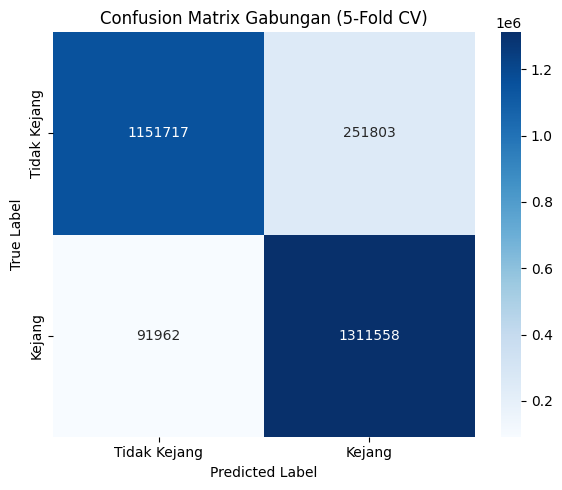

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7788
Test Accuracy  : 0.7774
Precision      : 0.9207
Recall         : 0.6070
F1 Score       : 0.7317
Confusion Matrix:
[[170393 110311]
 [ 14667 266037]]

Fold 2:
Train Accuracy : 0.7821
Test Accuracy  : 0.7806
Precision      : 0.9216
Recall         : 0.6135
F1 Score       : 0.7366
Confusion Matrix:
[[172203 108501]
 [ 14658 266046]]

Fold 3:
Train Accuracy : 0.7774
Test Accuracy  : 0.7773
Precision      : 0.9210
Recall         : 0.6066
F1 Score       : 0.7315
Confusion Matrix:
[[170283 110421]
 [ 14597 266107]]

Fold 4:
Train Accuracy : 0.7801
Test Accuracy  : 0.7790
Precision      : 0.9219
Recall         : 0.6097
F1 Score       : 0.7340
Confusion Matrix:
[[171145 109559]
 [ 14489 266215]]

Fold 5:
Train Accuracy : 0.7834
Test Accuracy  : 0.7829
Precision      : 0.9250
Recall         : 0.6157
F1 Score       : 0.7393
Confusion Matrix:
[[172816 107888]
 [ 14020 266684]]


=== Average Metrics ===
Mean Train Accuracy : 0.7804
Mean Test Accuracy  : 0.7794
Mean Pr

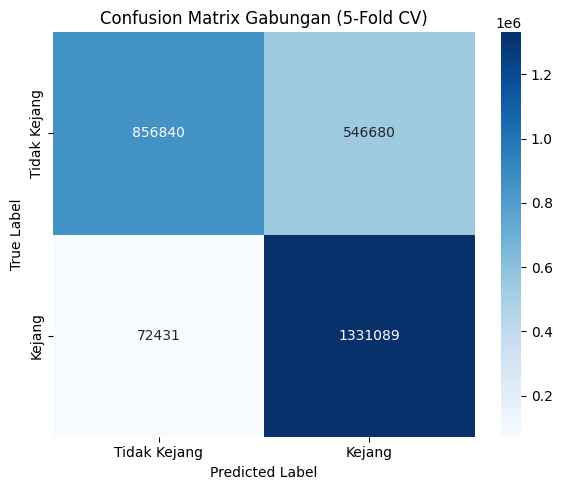

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.9327
Test Accuracy  : 0.8773
Precision      : 0.9259
Recall         : 0.8203
F1 Score       : 0.8699
Confusion Matrix:
[[230260  50444]
 [ 18424 262280]]

Fold 2:
Train Accuracy : 0.9336
Test Accuracy  : 0.8776
Precision      : 0.9247
Recall         : 0.8221
F1 Score       : 0.8704
Confusion Matrix:
[[230769  49935]
 [ 18784 261920]]

Fold 3:
Train Accuracy : 0.9350
Test Accuracy  : 0.8788
Precision      : 0.9259
Recall         : 0.8234
F1 Score       : 0.8716
Confusion Matrix:
[[231128  49576]
 [ 18493 262211]]

Fold 4:
Train Accuracy : 0.9345
Test Accuracy  : 0.8778
Precision      : 0.9252
Recall         : 0.8220
F1 Score       : 0.8705
Confusion Matrix:
[[230741  49963]
 [ 18662 262042]]

Fold 5:
Train Accuracy : 0.9362
Test Accuracy  : 0.8785
Precision      : 0.9269
Recall         : 0.8217
F1 Score       : 0.8712
Confusion Matrix:
[[230659  50045]
 [ 18180 262524]]


=== Average Metrics ===
Mean Train Accuracy : 0.9344
Mean Test Accuracy  : 0.8780
Mean Pr

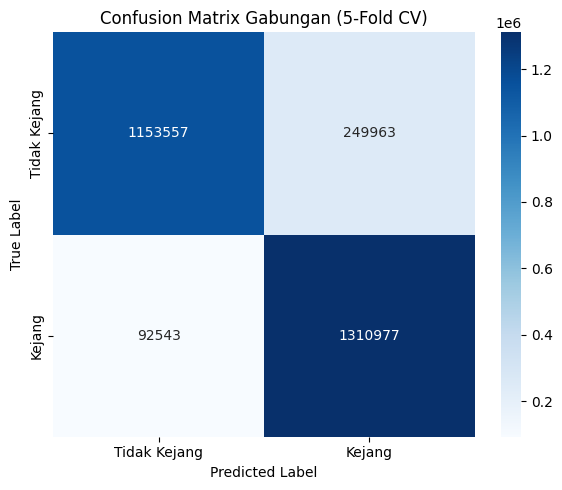

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7760
Test Accuracy  : 0.7747
Precision      : 0.9200
Recall         : 0.6017
F1 Score       : 0.7276
Confusion Matrix:
[[168913 111791]
 [ 14683 266021]]

Fold 2:
Train Accuracy : 0.7768
Test Accuracy  : 0.7751
Precision      : 0.9194
Recall         : 0.6031
F1 Score       : 0.7284
Confusion Matrix:
[[169297 111407]
 [ 14848 265856]]

Fold 3:
Train Accuracy : 0.7758
Test Accuracy  : 0.7754
Precision      : 0.9206
Recall         : 0.6029
F1 Score       : 0.7286
Confusion Matrix:
[[169232 111472]
 [ 14593 266111]]

Fold 4:
Train Accuracy : 0.7782
Test Accuracy  : 0.7771
Precision      : 0.9240
Recall         : 0.6039
F1 Score       : 0.7304
Confusion Matrix:
[[169524 111180]
 [ 13946 266758]]

Fold 5:
Train Accuracy : 0.7798
Test Accuracy  : 0.7791
Precision      : 0.9222
Recall         : 0.6096
F1 Score       : 0.7340
Confusion Matrix:
[[171109 109595]
 [ 14430 266274]]


=== Average Metrics ===
Mean Train Accuracy : 0.7773
Mean Test Accuracy  : 0.7763
Mean Pr

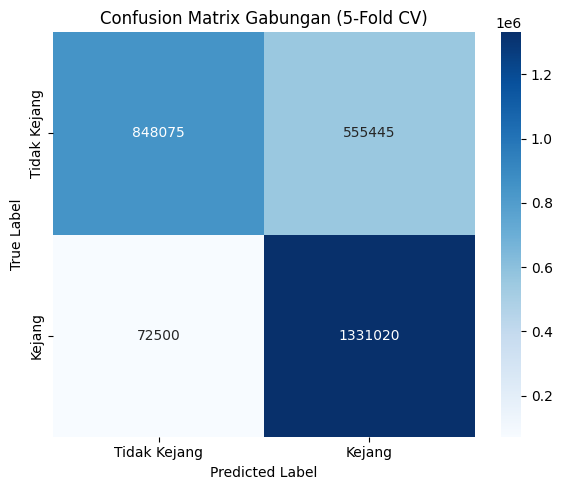

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8810
Test Accuracy  : 0.8566
Precision      : 0.9408
Recall         : 0.7612
F1 Score       : 0.8415
Confusion Matrix:
[[213678  67026]
 [ 13453 267251]]

Fold 2:
Train Accuracy : 0.8819
Test Accuracy  : 0.8579
Precision      : 0.9412
Recall         : 0.7635
F1 Score       : 0.8431
Confusion Matrix:
[[214307  66397]
 [ 13382 267322]]

Fold 3:
Train Accuracy : 0.8820
Test Accuracy  : 0.8586
Precision      : 0.9432
Recall         : 0.7633
F1 Score       : 0.8437
Confusion Matrix:
[[214251  66453]
 [ 12906 267798]]

Fold 4:
Train Accuracy : 0.8843
Test Accuracy  : 0.8590
Precision      : 0.9410
Recall         : 0.7659
F1 Score       : 0.8445
Confusion Matrix:
[[215000  65704]
 [ 13475 267229]]

Fold 5:
Train Accuracy : 0.8834
Test Accuracy  : 0.8591
Precision      : 0.9432
Recall         : 0.7643
F1 Score       : 0.8444
Confusion Matrix:
[[214548  66156]
 [ 12929 267775]]


=== Average Metrics ===
Mean Train Accuracy : 0.8825
Mean Test Accuracy  : 0.8583
Mean Pr

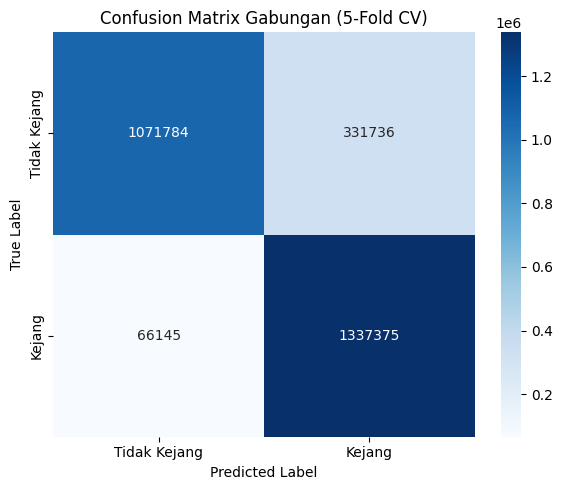

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.9234
Test Accuracy  : 0.8773
Precision      : 0.9250
Recall         : 0.8212
F1 Score       : 0.8700
Confusion Matrix:
[[230515  50189]
 [ 18700 262004]]

Fold 2:
Train Accuracy : 0.9236
Test Accuracy  : 0.8774
Precision      : 0.9237
Recall         : 0.8228
F1 Score       : 0.8704
Confusion Matrix:
[[230969  49735]
 [ 19066 261638]]

Fold 3:
Train Accuracy : 0.9214
Test Accuracy  : 0.8776
Precision      : 0.9263
Recall         : 0.8205
F1 Score       : 0.8702
Confusion Matrix:
[[230320  50384]
 [ 18313 262391]]

Fold 4:
Train Accuracy : 0.9243
Test Accuracy  : 0.8772
Precision      : 0.9257
Recall         : 0.8201
F1 Score       : 0.8697
Confusion Matrix:
[[230218  50486]
 [ 18469 262235]]

Fold 5:
Train Accuracy : 0.9239
Test Accuracy  : 0.8780
Precision      : 0.9272
Recall         : 0.8204
F1 Score       : 0.8706
Confusion Matrix:
[[230303  50401]
 [ 18085 262619]]


=== Average Metrics ===
Mean Train Ac

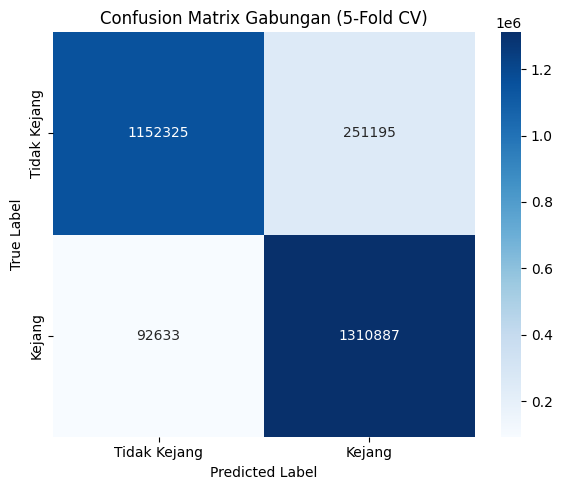

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.9297
Test Accuracy  : 0.8778
Precision      : 0.9253
Recall         : 0.8219
F1 Score       : 0.8706
Confusion Matrix:
[[230721  49983]
 [ 18623 262081]]

Fold 2:
Train Accuracy : 0.9308
Test Accuracy  : 0.8776
Precision      : 0.9243
Recall         : 0.8227
F1 Score       : 0.8705
Confusion Matrix:
[[230931  49773]
 [ 18921 261783]]

Fold 3:
Train Accuracy : 0.9293
Test Accuracy  : 0.8785
Precision      : 0.9261
Recall         : 0.8226
F1 Score       : 0.8713
Confusion Matrix:
[[230909  49795]
 [ 18434 262270]]

Fold 4:
Train Accuracy : 0.9293
Test Accuracy  : 0.8775
Precision      : 0.9255
Recall         : 0.8210
F1 Score       : 0.8701
Confusion Matrix:
[[230445  50259]
 [ 18537 262167]]



Fold 1:
Train Accuracy : 0.9343
Test Accuracy  : 0.8778
Precision      : 0.9243
Recall         : 0.8229
F1 Score       : 0.8707
Confusion Matrix:
[[231004  49700]
 [ 18923 261781]]

Fold 2:
Train Accuracy : 0.9368
Test Accuracy  : 0.8779
Precision      : 0.9230
Recall         : 0.8247
F1 Score       : 0.8711
Confusion Matrix:
[[231499  49205]
 [ 19324 261380]]

Fold 3:
Train Accuracy : 0.9355
Test Accuracy  : 0.8785
Precision      : 0.9255
Recall         : 0.8233
F1 Score       : 0.8714
Confusion Matrix:
[[231093  49611]
 [ 18604 262100]]

Fold 4:
Train Accuracy : 0.9365
Test Accuracy  : 0.8774
Precision      : 0.9241
Recall         : 0.8223
F1 Score       : 0.8702
Confusion Matrix:
[[230814  49890]
 [ 18964 261740]]

Fold 5:
Train Accuracy : 0.9341
Test Accuracy  : 0.8777
Precision      : 0.9275
Recall         : 0.8194
F1 Score       : 0.8701
Confusion Matrix:
[[230017  50687]
 [ 17976 262728]]


=== Average Metrics ===
Mean Train Accuracy : 0.9354
Mean Test Accuracy  : 0.8778
Mean Pr

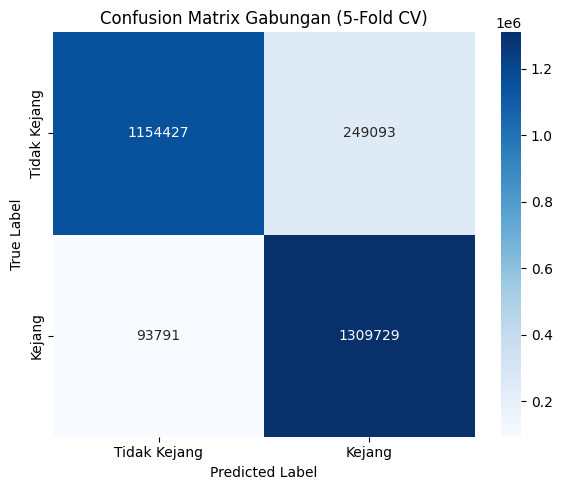

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8407
Test Accuracy  : 0.8337
Precision      : 0.9380
Recall         : 0.7145
F1 Score       : 0.8112
Confusion Matrix:
[[200562  80142]
 [ 13246 267458]]

Fold 2:
Train Accuracy : 0.8376
Test Accuracy  : 0.8306
Precision      : 0.9362
Recall         : 0.7095
F1 Score       : 0.8073
Confusion Matrix:
[[199171  81533]
 [ 13576 267128]]

Fold 3:
Train Accuracy : 0.8388
Test Accuracy  : 0.8331
Precision      : 0.9383
Recall         : 0.7130
F1 Score       : 0.8103
Confusion Matrix:
[[200140  80564]
 [ 13156 267548]]

Fold 4:
Train Accuracy : 0.8393
Test Accuracy  : 0.8317
Precision      : 0.9385
Recall         : 0.7100
F1 Score       : 0.8084
Confusion Matrix:
[[199300  81404]
 [ 13058 267646]]

Fold 5:
Train Accuracy : 0.8412
Test Accuracy  : 0.8346
Precision      : 0.9392
Recall         : 0.7155
F1 Score       : 0.8123
Confusion Matrix:
[[200856  79848]
 [ 12995 267709]]


=== Average Metrics ===
Mean Train Accuracy : 0.8395
Mean Test Accuracy  : 0.8327
Mean Pr

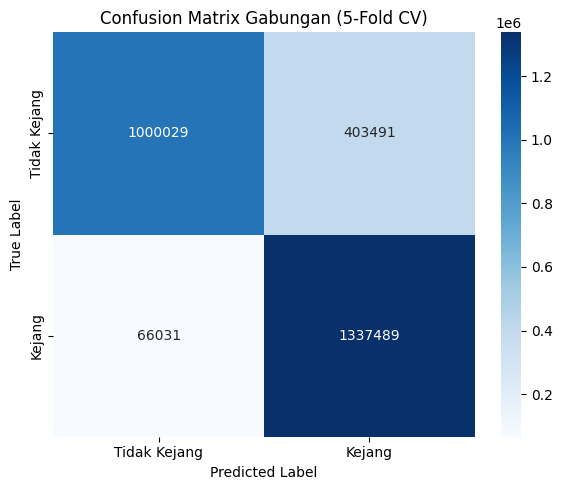

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7782
Test Accuracy  : 0.7768
Precision      : 0.9185
Recall         : 0.6075
F1 Score       : 0.7313
Confusion Matrix:
[[170515 110189]
 [ 15124 265580]]

Fold 2:
Train Accuracy : 0.7805
Test Accuracy  : 0.7786
Precision      : 0.9216
Recall         : 0.6090
F1 Score       : 0.7334
Confusion Matrix:
[[170954 109750]
 [ 14543 266161]]

Fold 3:
Train Accuracy : 0.7757
Test Accuracy  : 0.7755
Precision      : 0.9219
Recall         : 0.6021
F1 Score       : 0.7284
Confusion Matrix:
[[169011 111693]
 [ 14320 266384]]

Fold 4:
Train Accuracy : 0.7819
Test Accuracy  : 0.7807
Precision      : 0.9246
Recall         : 0.6113
F1 Score       : 0.7360
Confusion Matrix:
[[171595 109109]
 [ 14001 266703]]

Fold 5:
Train Accuracy : 0.7828
Test Accuracy  : 0.7820
Precision      : 0.9247
Recall         : 0.6140
F1 Score       : 0.7380
Confusion Matrix:
[[172347 108357]
 [ 14037 266667]]


=== Average Metrics ===
Mean Train Accuracy : 0.7798
Mean Test Accuracy  : 0.7787
Mean Pr

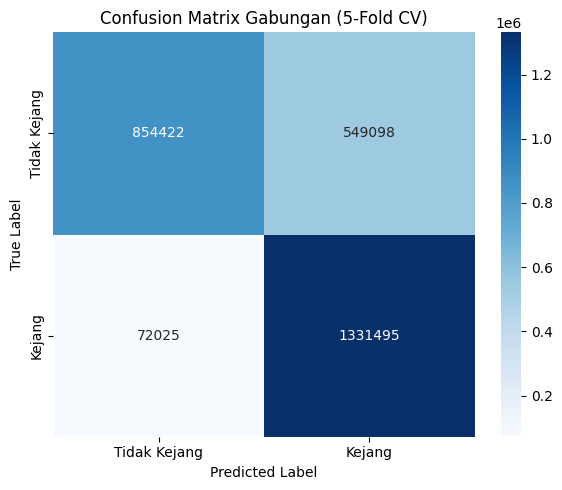

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7774
Test Accuracy  : 0.7759
Precision      : 0.9223
Recall         : 0.6026
F1 Score       : 0.7290
Confusion Matrix:
[[169159 111545]
 [ 14244 266460]]

Fold 2:
Train Accuracy : 0.7817
Test Accuracy  : 0.7801
Precision      : 0.9235
Recall         : 0.6109
F1 Score       : 0.7353
Confusion Matrix:
[[171475 109229]
 [ 14212 266492]]

Fold 3:
Train Accuracy : 0.7782
Test Accuracy  : 0.7781
Precision      : 0.9211
Recall         : 0.6083
F1 Score       : 0.7327
Confusion Matrix:
[[170748 109956]
 [ 14619 266085]]

Fold 4:
Train Accuracy : 0.7804
Test Accuracy  : 0.7793
Precision      : 0.9246
Recall         : 0.6081
F1 Score       : 0.7337
Confusion Matrix:
[[170706 109998]
 [ 13924 266780]]

Fold 5:
Train Accuracy : 0.7850
Test Accuracy  : 0.7841
Precision      : 0.9242
Recall         : 0.6190
F1 Score       : 0.7414
Confusion Matrix:
[[173757 106947]
 [ 14259 266445]]


=== Average Metrics ===
Mean Train Accuracy : 0.7805
Mean Test Accuracy  : 0.7795
Mean Pr

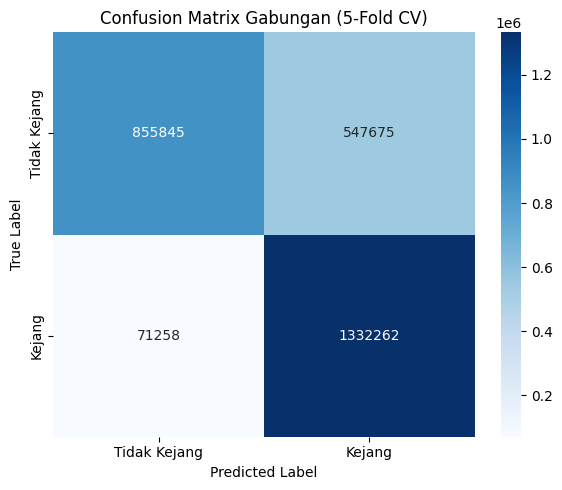

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8355
Test Accuracy  : 0.8286
Precision      : 0.9374
Recall         : 0.7042
F1 Score       : 0.8042
Confusion Matrix:
[[197674  83030]
 [ 13211 267493]]

Fold 2:
Train Accuracy : 0.8379
Test Accuracy  : 0.8309
Precision      : 0.9373
Recall         : 0.7093
F1 Score       : 0.8075
Confusion Matrix:
[[199109  81595]
 [ 13326 267378]]

Fold 3:
Train Accuracy : 0.8374
Test Accuracy  : 0.8313
Precision      : 0.9382
Recall         : 0.7093
F1 Score       : 0.8078
Confusion Matrix:
[[199093  81611]
 [ 13114 267590]]

Fold 4:
Train Accuracy : 0.8412
Test Accuracy  : 0.8338
Precision      : 0.9379
Recall         : 0.7149
F1 Score       : 0.8113
Confusion Matrix:
[[200672  80032]
 [ 13296 267408]]

Fold 5:
Train Accuracy : 0.8383
Test Accuracy  : 0.8318
Precision      : 0.9373
Recall         : 0.7111
F1 Score       : 0.8087
Confusion Matrix:
[[199621  81083]
 [ 13352 267352]]


=== Average Metrics ===
Mean Train Ac

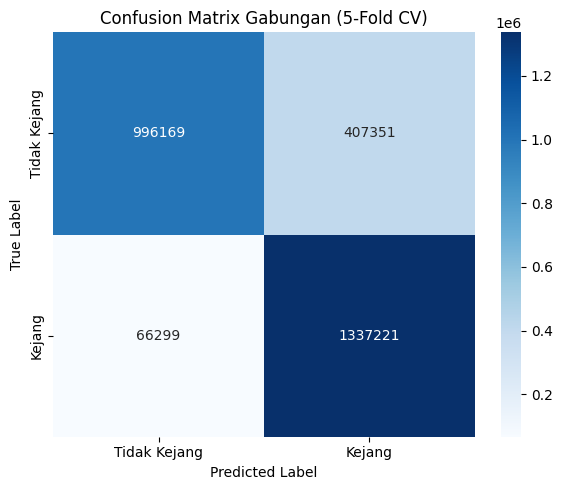

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7759
Test Accuracy  : 0.7745
Precision      : 0.9181
Recall         : 0.6029
F1 Score       : 0.7278
Confusion Matrix:
[[169231 111473]
 [ 15104 265600]]

Fold 2:
Train Accuracy : 0.7799
Test Accuracy  : 0.7781
Precision      : 0.9219
Recall         : 0.6077
F1 Score       : 0.7325
Confusion Matrix:
[[170588 110116]
 [ 14455 266249]]

Fold 3:
Train Accuracy : 0.7757
Test Accuracy  : 0.7756
Precision      : 0.9215
Recall         : 0.6026
F1 Score       : 0.7287
Confusion Matrix:
[[169144 111560]
 [ 14402 266302]]

Fold 4:
Train Accuracy : 0.7792
Test Accuracy  : 0.7780
Precision      : 0.9237
Recall         : 0.6061
F1 Score       : 0.7319
Confusion Matrix:
[[170133 110571]
 [ 14044 266660]]

Fold 5:
Train Accuracy : 0.7808
Test Accuracy  : 0.7802
Precision      : 0.9237
Recall         : 0.6109
F1 Score       : 0.7354
Confusion Matrix:
[[171472 109232]
 [ 14174 266530]]


=== Average Metrics ===
Mean Train Accuracy : 0.7783
Mean Test Accuracy  : 0.7773
Mean Pr

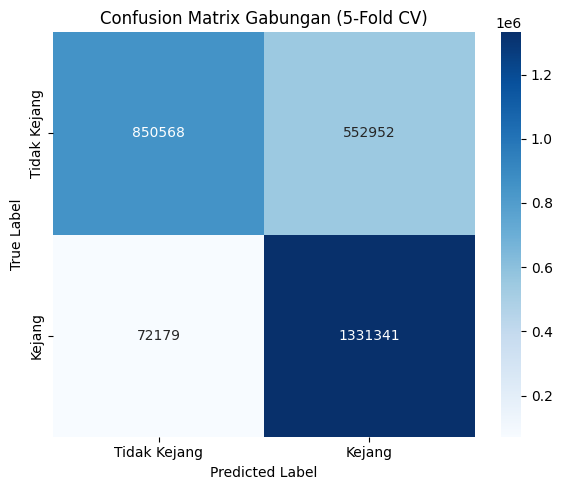

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8802
Test Accuracy  : 0.8572
Precision      : 0.9407
Recall         : 0.7625
F1 Score       : 0.8423
Confusion Matrix:
[[214028  66676]
 [ 13480 267224]]

Fold 2:
Train Accuracy : 0.8799
Test Accuracy  : 0.8574
Precision      : 0.9417
Recall         : 0.7620
F1 Score       : 0.8424
Confusion Matrix:
[[213893  66811]
 [ 13246 267458]]

Fold 3:
Train Accuracy : 0.8813
Test Accuracy  : 0.8595
Precision      : 0.9415
Recall         : 0.7665
F1 Score       : 0.8451
Confusion Matrix:
[[215173  65531]
 [ 13362 267342]]

Fold 4:
Train Accuracy : 0.8809
Test Accuracy  : 0.8572
Precision      : 0.9413
Recall         : 0.7620
F1 Score       : 0.8422
Confusion Matrix:
[[213887  66817]
 [ 13338 267366]]

Fold 5:
Train Accuracy : 0.8823
Test Accuracy  : 0.8593
Precision      : 0.9412
Recall         : 0.7666
F1 Score       : 0.8450
Confusion Matrix:
[[215182  65522]
 [ 13450 267254]]


=== Average Metrics ===
Mean Train Ac

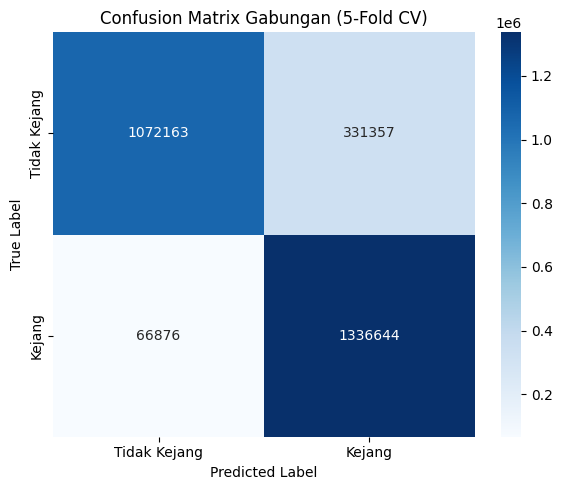

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8789
Test Accuracy  : 0.8602
Precision      : 0.9391
Recall         : 0.7703
F1 Score       : 0.8464
Confusion Matrix:
[[216230  64474]
 [ 14011 266693]]

Fold 2:
Train Accuracy : 0.8785
Test Accuracy  : 0.8603
Precision      : 0.9393
Recall         : 0.7704
F1 Score       : 0.8465
Confusion Matrix:
[[216242  64462]
 [ 13968 266736]]

Fold 3:
Train Accuracy : 0.8763
Test Accuracy  : 0.8590
Precision      : 0.9426
Recall         : 0.7646
F1 Score       : 0.8443
Confusion Matrix:
[[214621  66083]
 [ 13062 267642]]

Fold 4:
Train Accuracy : 0.8761
Test Accuracy  : 0.8576
Precision      : 0.9417
Recall         : 0.7625
F1 Score       : 0.8427
Confusion Matrix:
[[214028  66676]
 [ 13244 267460]]

Fold 5:
Train Accuracy : 0.8767
Test Accuracy  : 0.8588
Precision      : 0.9419
Recall         : 0.7647
F1 Score       : 0.8441
Confusion Matrix:
[[214656  66048]
 [ 13231 267473]]


=== Average Metrics ===
Mean Train Ac

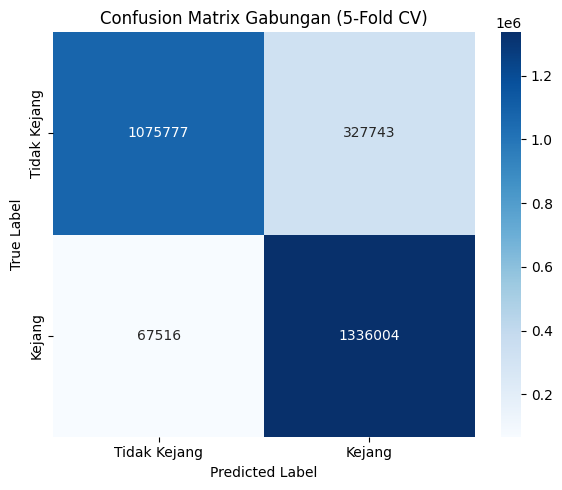

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8380
Test Accuracy  : 0.8305
Precision      : 0.9381
Recall         : 0.7076
F1 Score       : 0.8067
Confusion Matrix:
[[198632  82072]
 [ 13110 267594]]

Fold 2:
Train Accuracy : 0.8391
Test Accuracy  : 0.8312
Precision      : 0.9380
Recall         : 0.7093
F1 Score       : 0.8078
Confusion Matrix:
[[199106  81598]
 [ 13163 267541]]

Fold 3:
Train Accuracy : 0.8379
Test Accuracy  : 0.8312
Precision      : 0.9386
Recall         : 0.7087
F1 Score       : 0.8076
Confusion Matrix:
[[198934  81770]
 [ 13020 267684]]

Fold 4:
Train Accuracy : 0.8403
Test Accuracy  : 0.8321
Precision      : 0.9383
Recall         : 0.7109
F1 Score       : 0.8089
Confusion Matrix:
[[199559  81145]
 [ 13129 267575]]

Fold 5:
Train Accuracy : 0.8421
Test Accuracy  : 0.8347
Precision      : 0.9393
Recall         : 0.7156
F1 Score       : 0.8123
Confusion Matrix:
[[200870  79834]
 [ 12975 267729]]


=== Average Metrics ===
Mean Train Accuracy : 0.8395
Mean Test Accuracy  : 0.8319
Mean Pr

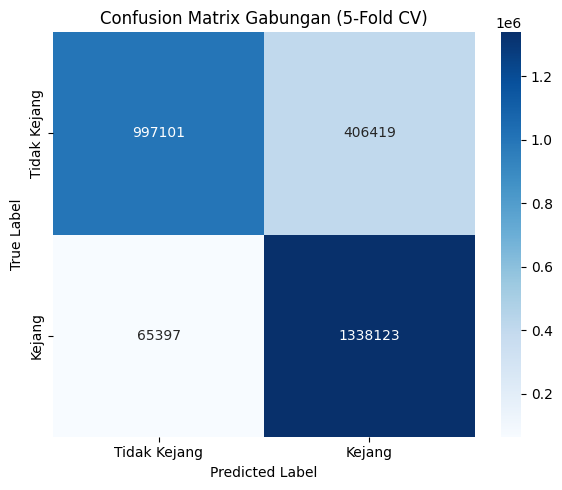

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7776
Test Accuracy  : 0.7761
Precision      : 0.9207
Recall         : 0.6042
F1 Score       : 0.7296
Confusion Matrix:
[[169607 111097]
 [ 14613 266091]]

Fold 2:
Train Accuracy : 0.7787
Test Accuracy  : 0.7771
Precision      : 0.9196
Recall         : 0.6073
F1 Score       : 0.7315
Confusion Matrix:
[[170464 110240]
 [ 14911 265793]]

Fold 3:
Train Accuracy : 0.7795
Test Accuracy  : 0.7792
Precision      : 0.9211
Recall         : 0.6107
F1 Score       : 0.7344
Confusion Matrix:
[[171420 109284]
 [ 14676 266028]]

Fold 4:
Train Accuracy : 0.7816
Test Accuracy  : 0.7803
Precision      : 0.9239
Recall         : 0.6110
F1 Score       : 0.7356
Confusion Matrix:
[[171523 109181]
 [ 14134 266570]]

Fold 5:
Train Accuracy : 0.7812
Test Accuracy  : 0.7805
Precision      : 0.9229
Recall         : 0.6122
F1 Score       : 0.7361
Confusion Matrix:
[[171842 108862]
 [ 14356 266348]]


=== Average Metrics ===
Mean Train Accuracy : 0.7797
Mean Test Accuracy  : 0.7786
Mean Pr

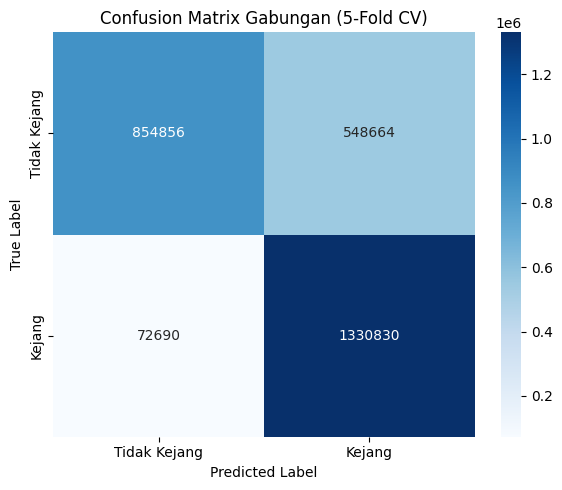

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8395
Test Accuracy  : 0.8317
Precision      : 0.9378
Recall         : 0.7105
F1 Score       : 0.8085
Confusion Matrix:
[[199444  81260]
 [ 13237 267467]]

Fold 2:
Train Accuracy : 0.8390
Test Accuracy  : 0.8313
Precision      : 0.9374
Recall         : 0.7100
F1 Score       : 0.8080
Confusion Matrix:
[[199297  81407]
 [ 13306 267398]]

Fold 3:
Train Accuracy : 0.8421
Test Accuracy  : 0.8348
Precision      : 0.9395
Recall         : 0.7158
F1 Score       : 0.8125
Confusion Matrix:
[[200915  79789]
 [ 12942 267762]]

Fold 4:
Train Accuracy : 0.8389
Test Accuracy  : 0.8305
Precision      : 0.9383
Recall         : 0.7075
F1 Score       : 0.8067
Confusion Matrix:
[[198607  82097]
 [ 13068 267636]]

Fold 5:
Train Accuracy : 0.8404
Test Accuracy  : 0.8328
Precision      : 0.9395
Recall         : 0.7115
F1 Score       : 0.8097
Confusion Matrix:
[[199718  80986]
 [ 12864 267840]]


=== Average Metrics ===
Mean Train Accuracy : 0.8400
Mean Test Accuracy  : 0.8322
Mean Pr

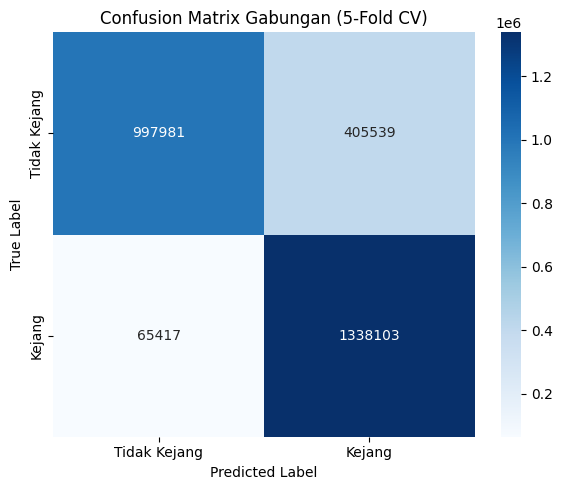

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7770
Test Accuracy  : 0.7756
Precision      : 0.9205
Recall         : 0.6032
F1 Score       : 0.7288
Confusion Matrix:
[[169326 111378]
 [ 14626 266078]]

Fold 2:
Train Accuracy : 0.7802
Test Accuracy  : 0.7785
Precision      : 0.9227
Recall         : 0.6078
F1 Score       : 0.7329
Confusion Matrix:
[[170624 110080]
 [ 14291 266413]]

Fold 3:
Train Accuracy : 0.7777
Test Accuracy  : 0.7777
Precision      : 0.9218
Recall         : 0.6068
F1 Score       : 0.7319
Confusion Matrix:
[[170336 110368]
 [ 14441 266263]]

Fold 4:
Train Accuracy : 0.7798
Test Accuracy  : 0.7785
Precision      : 0.9234
Recall         : 0.6073
F1 Score       : 0.7327
Confusion Matrix:
[[170474 110230]
 [ 14133 266571]]

Fold 5:
Train Accuracy : 0.7812
Test Accuracy  : 0.7805
Precision      : 0.9236
Recall         : 0.6115
F1 Score       : 0.7358
Confusion Matrix:
[[171649 109055]
 [ 14199 266505]]


=== Average Metrics ===
Mean Train Accuracy : 0.7792
Mean Test Accuracy  : 0.7781
Mean Pr

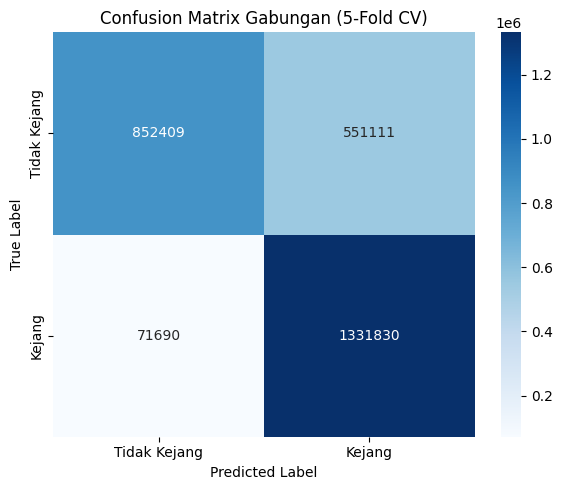

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.9306
Test Accuracy  : 0.8779
Precision      : 0.9243
Recall         : 0.8231
F1 Score       : 0.8708
Confusion Matrix:
[[231046  49658]
 [ 18914 261790]]

Fold 2:
Train Accuracy : 0.9320
Test Accuracy  : 0.8777
Precision      : 0.9232
Recall         : 0.8239
F1 Score       : 0.8708
Confusion Matrix:
[[231276  49428]
 [ 19231 261473]]

Fold 3:
Train Accuracy : 0.9289
Test Accuracy  : 0.8784
Precision      : 0.9254
Recall         : 0.8231
F1 Score       : 0.8713
Confusion Matrix:
[[231060  49644]
 [ 18622 262082]]

Fold 4:
Train Accuracy : 0.9309
Test Accuracy  : 0.8779
Precision      : 0.9239
Recall         : 0.8238
F1 Score       : 0.8709
Confusion Matrix:
[[231232  49472]
 [ 19055 261649]]

Fold 5:
Train Accuracy : 0.9286
Test Accuracy  : 0.8776
Precision      : 0.9270
Recall         : 0.8197
F1 Score       : 0.8701
Confusion Matrix:
[[230101  50603]
 [ 18118 262586]]


=== Average Metrics ===
Mean Train Accuracy : 0.9302
Mean Test Accuracy  : 0.8779
Mean Pr

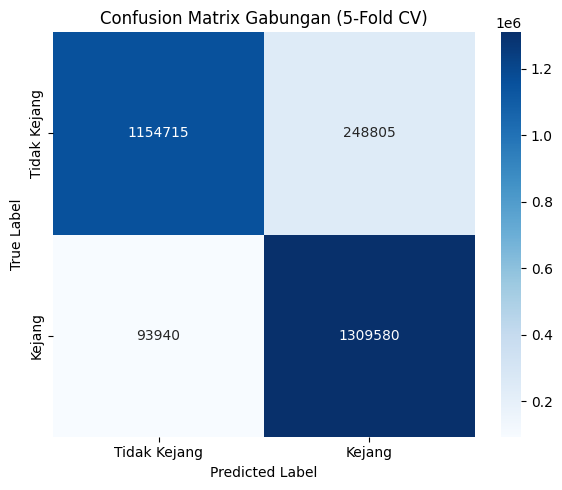

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.7762
Test Accuracy  : 0.7749
Precision      : 0.9191
Recall         : 0.6028
F1 Score       : 0.7281
Confusion Matrix:
[[169209 111495]
 [ 14899 265805]]

Fold 2:
Train Accuracy : 0.7780
Test Accuracy  : 0.7761
Precision      : 0.9207
Recall         : 0.6043
F1 Score       : 0.7297
Confusion Matrix:
[[169637 111067]
 [ 14608 266096]]

Fold 3:
Train Accuracy : 0.7761
Test Accuracy  : 0.7759
Precision      : 0.9213
Recall         : 0.6033
F1 Score       : 0.7292
Confusion Matrix:
[[169360 111344]
 [ 14470 266234]]

Fold 4:
Train Accuracy : 0.7793
Test Accuracy  : 0.7781
Precision      : 0.9240
Recall         : 0.6060
F1 Score       : 0.7320
Confusion Matrix:
[[170110 110594]
 [ 13991 266713]]

Fold 5:
Train Accuracy : 0.7806
Test Accuracy  : 0.7799
Precision      : 0.9231
Recall         : 0.6106
F1 Score       : 0.7350
Confusion Matrix:
[[171401 109303]
 [ 14277 266427]]


=== Average Metrics ===
Mean Train Accuracy : 0.7780
Mean Test Accuracy  : 0.7770
Mean Pr

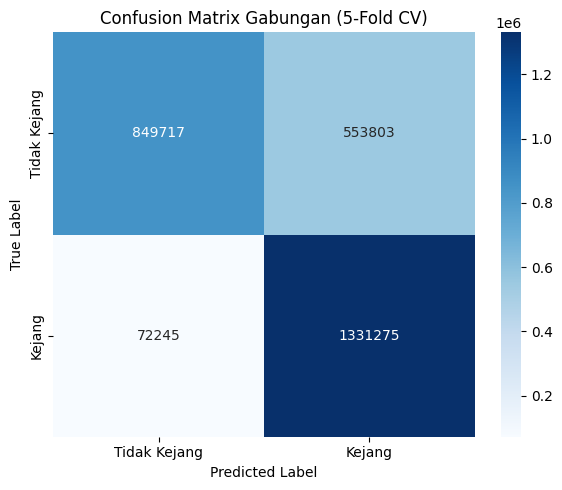

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.9224
Test Accuracy  : 0.8769
Precision      : 0.9252
Recall         : 0.8201
F1 Score       : 0.8695
Confusion Matrix:
[[230209  50495]
 [ 18600 262104]]

Fold 2:
Train Accuracy : 0.9232
Test Accuracy  : 0.8766
Precision      : 0.9241
Recall         : 0.8206
F1 Score       : 0.8693
Confusion Matrix:
[[230355  50349]
 [ 18919 261785]]

Fold 3:
Train Accuracy : 0.9231
Test Accuracy  : 0.8776
Precision      : 0.9254
Recall         : 0.8213
F1 Score       : 0.8703
Confusion Matrix:
[[230546  50158]
 [ 18575 262129]]

Fold 4:
Train Accuracy : 0.9231
Test Accuracy  : 0.8769
Precision      : 0.9248
Recall         : 0.8206
F1 Score       : 0.8696
Confusion Matrix:
[[230339  50365]
 [ 18722 261982]]

Fold 5:
Train Accuracy : 0.9238
Test Accuracy  : 0.8775
Precision      : 0.9277
Recall         : 0.8188
F1 Score       : 0.8698
Confusion Matrix:
[[229843  50861]
 [ 17925 262779]]


=== Average Metrics ===
Mean Train Accuracy : 0.9231
Mean Test Accuracy  : 0.8771
Mean Pr

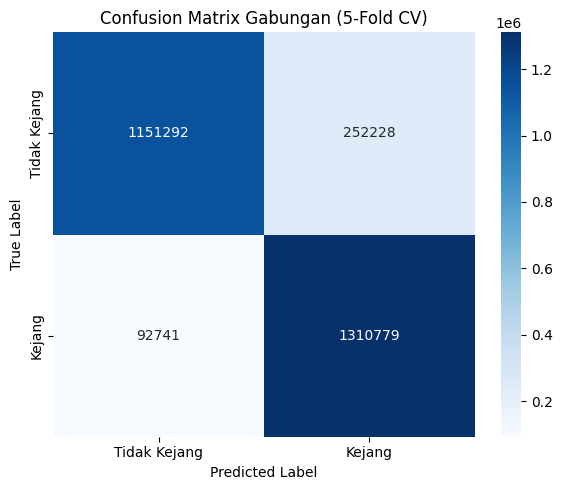

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8771
Test Accuracy  : 0.8582
Precision      : 0.9416
Recall         : 0.7639
F1 Score       : 0.8435
Confusion Matrix:
[[214416  66288]
 [ 13293 267411]]

Fold 2:
Train Accuracy : 0.8758
Test Accuracy  : 0.8572
Precision      : 0.9416
Recall         : 0.7617
F1 Score       : 0.8421
Confusion Matrix:
[[213818  66886]
 [ 13269 267435]]

Fold 3:
Train Accuracy : 0.8785
Test Accuracy  : 0.8602
Precision      : 0.9414
Recall         : 0.7683
F1 Score       : 0.8461
Confusion Matrix:
[[215671  65033]
 [ 13430 267274]]

Fold 4:
Train Accuracy : 0.8776
Test Accuracy  : 0.8583
Precision      : 0.9413
Recall         : 0.7643
F1 Score       : 0.8436
Confusion Matrix:
[[214533  66171]
 [ 13381 267323]]

Fold 5:
Train Accuracy : 0.8772
Test Accuracy  : 0.8587
Precision      : 0.9432
Recall         : 0.7633
F1 Score       : 0.8438
Confusion Matrix:
[[214262  66442]
 [ 12899 267805]]


=== Average Metrics ===
Mean Train Accuracy : 0.8772
Mean Test Accuracy  : 0.8585
Mean Pr

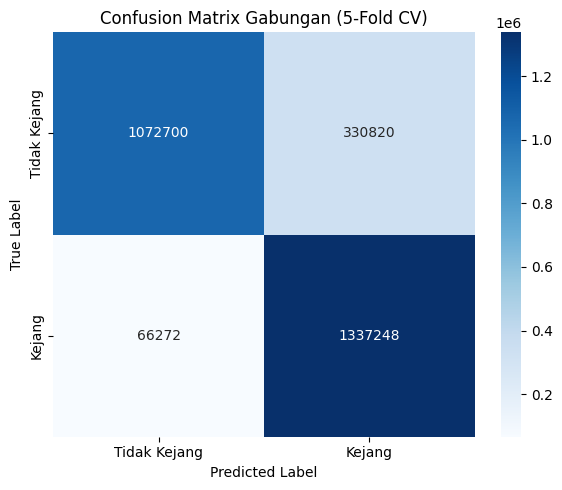

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.9219
Test Accuracy  : 0.8771
Precision      : 0.9264
Recall         : 0.8192
F1 Score       : 0.8695
Confusion Matrix:
[[229965  50739]
 [ 18261 262443]]

Fold 2:
Train Accuracy : 0.9249
Test Accuracy  : 0.8774
Precision      : 0.9244
Recall         : 0.8220
F1 Score       : 0.8702
Confusion Matrix:
[[230737  49967]
 [ 18883 261821]]

Fold 3:
Train Accuracy : 0.9222
Test Accuracy  : 0.8775
Precision      : 0.9263
Recall         : 0.8204
F1 Score       : 0.8701
Confusion Matrix:
[[230279  50425]
 [ 18327 262377]]

Fold 4:
Train Accuracy : 0.9242
Test Accuracy  : 0.8771
Precision      : 0.9250
Recall         : 0.8206
F1 Score       : 0.8697
Confusion Matrix:
[[230350  50354]
 [ 18670 262034]]

Fold 5:
Train Accuracy : 0.9245
Test Accuracy  : 0.8781
Precision      : 0.9278
Recall         : 0.8199
F1 Score       : 0.8705
Confusion Matrix:
[[230139  50565]
 [ 17897 262807]]


=== Average Metrics ===
Mean Train Accuracy : 0.9235
Mean Test Accuracy  : 0.8774
Mean Pr

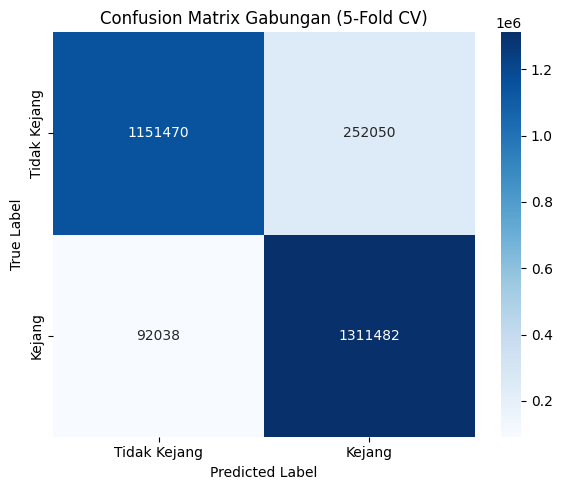

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.9297
Test Accuracy  : 0.8778
Precision      : 0.9253
Recall         : 0.8219
F1 Score       : 0.8706
Confusion Matrix:
[[230721  49983]
 [ 18623 262081]]

Fold 2:
Train Accuracy : 0.9308
Test Accuracy  : 0.8776
Precision      : 0.9243
Recall         : 0.8227
F1 Score       : 0.8705
Confusion Matrix:
[[230931  49773]
 [ 18921 261783]]

Fold 3:
Train Accuracy : 0.9293
Test Accuracy  : 0.8785
Precision      : 0.9261
Recall         : 0.8226
F1 Score       : 0.8713
Confusion Matrix:
[[230909  49795]
 [ 18434 262270]]

Fold 4:
Train Accuracy : 0.9293
Test Accuracy  : 0.8775
Precision      : 0.9255
Recall         : 0.8210
F1 Score       : 0.8701
Confusion Matrix:
[[230445  50259]
 [ 18537 262167]]

Fold 5:
Train Accuracy : 0.9286
Test Accuracy  : 0.8779
Precision      : 0.9274
Recall         : 0.8199
F1 Score     

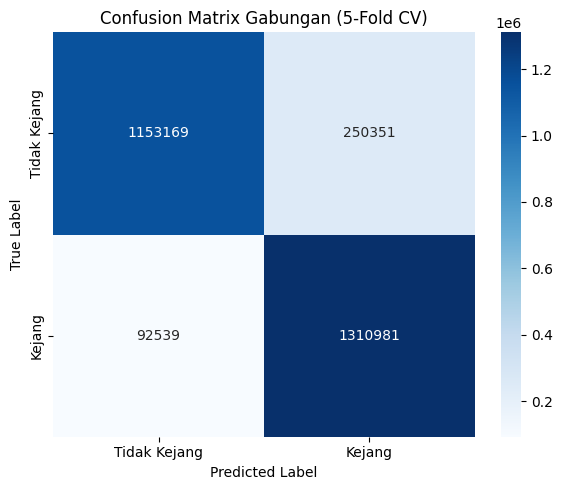

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.9342
Test Accuracy  : 0.8779
Precision      : 0.9252
Recall         : 0.8222
F1 Score       : 0.8707
Confusion Matrix:
[[230804  49900]
 [ 18672 262032]]

Fold 2:
Train Accuracy : 0.9355
Test Accuracy  : 0.8779
Precision      : 0.9243
Recall         : 0.8232
F1 Score       : 0.8708
Confusion Matrix:
[[231077  49627]
 [ 18928 261776]]

Fold 3:
Train Accuracy : 0.9339
Test Accuracy  : 0.8782
Precision      : 0.9269
Recall         : 0.8212
F1 Score       : 0.8709
Confusion Matrix:
[[230503  50201]
 [ 18167 262537]]



Fold 1:
Train Accuracy : 0.7766
Test Accuracy  : 0.7750
Precision      : 0.9203
Recall         : 0.6022
F1 Score       : 0.7280
Confusion Matrix:
[[169041 111663]
 [ 14643 266061]]

Fold 2:
Train Accuracy : 0.7805
Test Accuracy  : 0.7787
Precision      : 0.9228
Recall         : 0.6084
F1 Score       : 0.7333
Confusion Matrix:
[[170768 109936]
 [ 14278 266426]]

Fold 3:
Train Accuracy : 0.7782
Test Accuracy  : 0.7781
Precision      : 0.9217
Recall         : 0.6078
F1 Score       : 0.7325
Confusion Matrix:
[[170614 110090]
 [ 14491 266213]]

Fold 4:
Train Accuracy : 0.7796
Test Accuracy  : 0.7783
Precision      : 0.9234
Recall         : 0.6069
F1 Score       : 0.7324
Confusion Matrix:
[[170354 110350]
 [ 14126 266578]]

Fold 5:
Train Accuracy : 0.7826
Test Accuracy  : 0.7820
Precision      : 0.9239
Recall         : 0.6145
F1 Score       : 0.7381
Confusion Matrix:
[[172490 108214]
 [ 14200 266504]]


=== Average Metrics ===
Mean Train Accuracy : 0.7795
Mean Test Accuracy  : 0.7784
Mean Pr

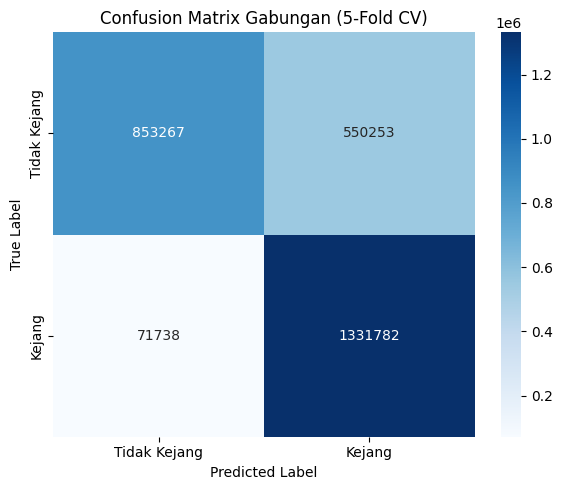

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8511
Test Accuracy  : 0.8432
Precision      : 0.9385
Recall         : 0.7346
F1 Score       : 0.8241
Confusion Matrix:
[[206205  74499]
 [ 13515 267189]]

Fold 2:
Train Accuracy : 0.8514
Test Accuracy  : 0.8441
Precision      : 0.9383
Recall         : 0.7367
F1 Score       : 0.8254
Confusion Matrix:
[[206794  73910]
 [ 13600 267104]]

Fold 3:
Train Accuracy : 0.8498
Test Accuracy  : 0.8435
Precision      : 0.9388
Recall         : 0.7349
F1 Score       : 0.8245
Confusion Matrix:
[[206298  74406]
 [ 13439 267265]]

Fold 4:
Train Accuracy : 0.8529
Test Accuracy  : 0.8446
Precision      : 0.9379
Recall         : 0.7381
F1 Score       : 0.8261
Confusion Matrix:
[[207184  73520]
 [ 13714 266990]]

Fold 5:
Train Accuracy : 0.8505
Test Accuracy  : 0.8428
Precision      : 0.9393
Recall         : 0.7329
F1 Score     

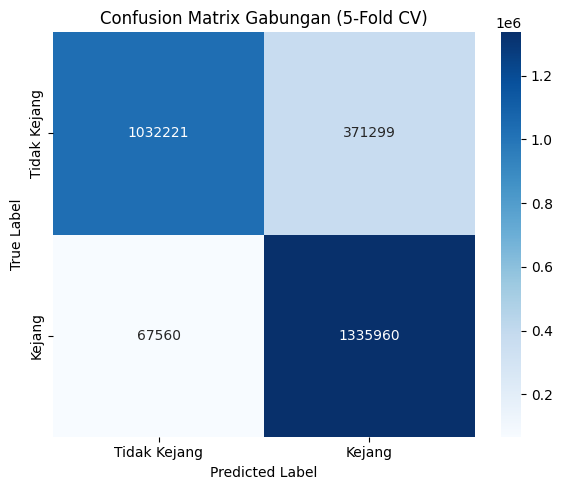

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8396
Test Accuracy  : 0.8327
Precision      : 0.9380
Recall         : 0.7125
F1 Score       : 0.8099
Confusion Matrix:
[[200013  80691]
 [ 13225 267479]]

Fold 2:
Train Accuracy : 0.8377
Test Accuracy  : 0.8305
Precision      : 0.9370
Recall         : 0.7087
F1 Score       : 0.8070
Confusion Matrix:
[[198937  81767]
 [ 13373 267331]]

Fold 3:
Train Accuracy : 0.8376
Test Accuracy  : 0.8316
Precision      : 0.9380
Recall         : 0.7102
F1 Score       : 0.8083
Confusion Matrix:
[[199354  81350]
 [ 13187 267517]]

Fold 4:
Train Accuracy : 0.8371
Test Accuracy  : 0.8298
Precision      : 0.9377
Recall         : 0.7066
F1 Score       : 0.8059
Confusion Matrix:
[[198344  82360]
 [ 13176 267528]]

Fold 5:
Train Accuracy : 0.8375
Test Accuracy  : 0.8308
Precision      : 0.9388
Recall         : 0.7077
F1 Score       : 0.8070
Confusion Matrix:
[[198651  82053]
 [ 12949 267755]]


=== Average Metrics ===
Mean Train Ac

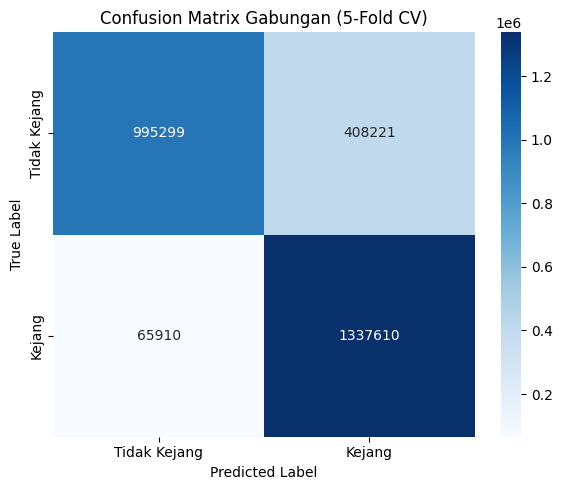

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8553
Test Accuracy  : 0.8474
Precision      : 0.9366
Recall         : 0.7453
F1 Score       : 0.8300
Confusion Matrix:
[[209200  71504]
 [ 14169 266535]]

Fold 2:
Train Accuracy : 0.8565
Test Accuracy  : 0.8486
Precision      : 0.9364
Recall         : 0.7479
F1 Score       : 0.8316
Confusion Matrix:
[[209949  70755]
 [ 14251 266453]]

Fold 3:
Train Accuracy : 0.8579
Test Accuracy  : 0.8506
Precision      : 0.9360
Recall         : 0.7526
F1 Score       : 0.8343
Confusion Matrix:
[[211253  69451]
 [ 14434 266270]]

Fold 4:
Train Accuracy : 0.8572
Test Accuracy  : 0.8486
Precision      : 0.9381
Recall         : 0.7464
F1 Score       : 0.8313
Confusion Matrix:
[[209507  71197]
 [ 13826 266878]]

Fold 5:
Train Accuracy : 0.8551
Test Accuracy  : 0.8475
Precision      : 0.9398
Recall         : 0.7426
F1 Score     

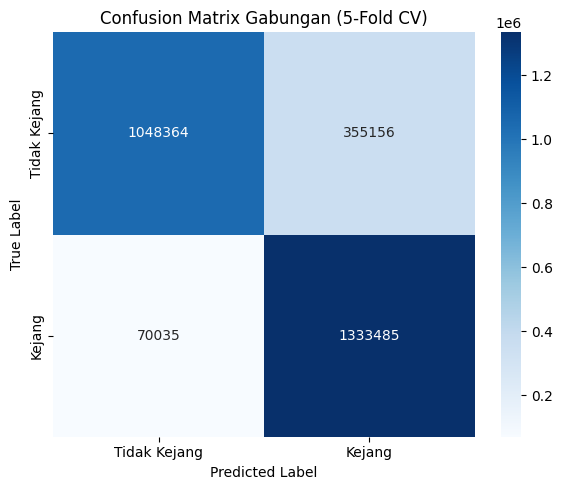

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8404
Test Accuracy  : 0.8332
Precision      : 0.9381
Recall         : 0.7135
F1 Score       : 0.8105
Confusion Matrix:
[[200278  80426]
 [ 13215 267489]]

Fold 2:
Train Accuracy : 0.8381
Test Accuracy  : 0.8310
Precision      : 0.9367
Recall         : 0.7099
F1 Score       : 0.8077
Confusion Matrix:
[[199275  81429]
 [ 13461 267243]]

Fold 3:
Train Accuracy : 0.8377
Test Accuracy  : 0.8318
Precision      : 0.9379
Recall         : 0.7107
F1 Score       : 0.8086
Confusion Matrix:
[[199484  81220]
 [ 13216 267488]]

Fold 4:
Train Accuracy : 0.8390
Test Accuracy  : 0.8317
Precision      : 0.9380
Recall         : 0.7103
F1 Score       : 0.8084
Confusion Matrix:
[[199396  81308]
 [ 13190 267514]]

Fold 5:
Train Accuracy : 0.8392
Test Accuracy  : 0.8326
Precision      : 0.9393
Recall         : 0.7110
F1 Score       : 0.8094
Confusion Matrix:
[[199589  81115]
 [ 12888 267816]]


=== Average Metrics ===
Mean Train Ac

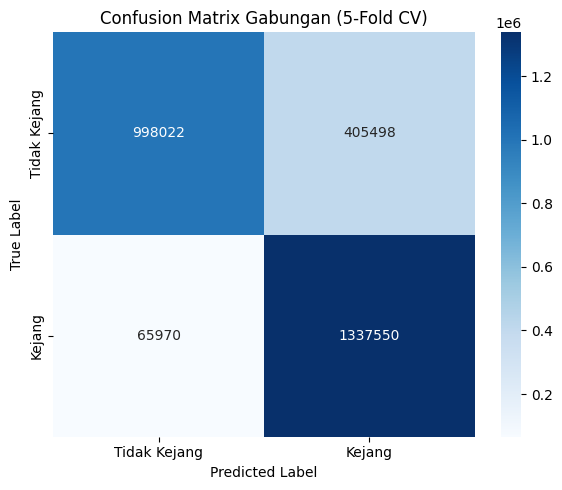

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8431
Test Accuracy  : 0.8327
Precision      : 0.9296
Recall         : 0.7199
F1 Score       : 0.8114
Confusion Matrix:
[[202075  78629]
 [ 15308 265396]]

Fold 2:
Train Accuracy : 0.8433
Test Accuracy  : 0.8333
Precision      : 0.9300
Recall         : 0.7207
F1 Score       : 0.8121
Confusion Matrix:
[[202310  78394]
 [ 15218 265486]]

Fold 3:
Train Accuracy : 0.8425
Test Accuracy  : 0.8335
Precision      : 0.9298
Recall         : 0.7215
F1 Score       : 0.8125
Confusion Matrix:
[[202534  78170]
 [ 15286 265418]]

Fold 4:
Train Accuracy : 0.8427
Test Accuracy  : 0.8319
Precision      : 0.9309
Recall         : 0.7171
F1 Score       : 0.8101
Confusion Matrix:
[[201300  79404]
 [ 14950 265754]]

Fold 5:
Train Accuracy : 0.8413
Test Accuracy  : 0.8316
Precision      : 0.9324
Recall         : 0.7150
F1 Score     

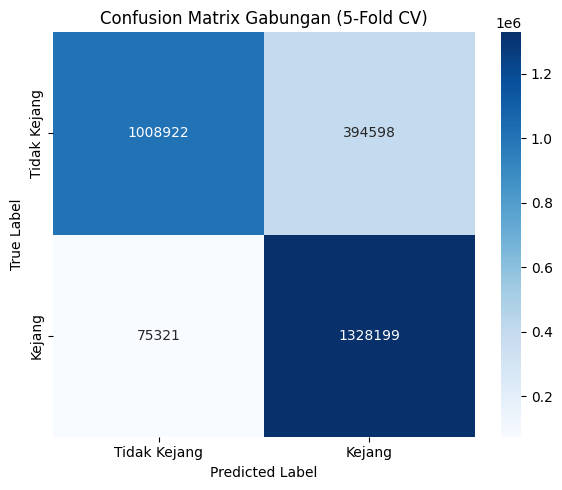

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8394
Test Accuracy  : 0.8318
Precision      : 0.9382
Recall         : 0.7105
F1 Score       : 0.8086
Confusion Matrix:
[[199434  81270]
 [ 13148 267556]]

Fold 2:
Train Accuracy : 0.8376
Test Accuracy  : 0.8297
Precision      : 0.9378
Recall         : 0.7062
F1 Score       : 0.8057
Confusion Matrix:
[[198239  82465]
 [ 13146 267558]]

Fold 3:
Train Accuracy : 0.8372
Test Accuracy  : 0.8305
Precision      : 0.9385
Recall         : 0.7073
F1 Score       : 0.8066
Confusion Matrix:
[[198531  82173]
 [ 13008 267696]]

Fold 4:
Train Accuracy : 0.8388
Test Accuracy  : 0.8307
Precision      : 0.9383
Recall         : 0.7079
F1 Score       : 0.8070
Confusion Matrix:
[[198718  81986]
 [ 13070 267634]]

Fold 5:
Train Accuracy : 0.8405
Test Accuracy  : 0.8331
Precision      : 0.9394
Recall         : 0.7121
F1 Score       : 0.8101
Confusion Matrix:
[[199890  80814]
 [ 12903 267801]]


=== Average Metrics ===
Mean Train Ac

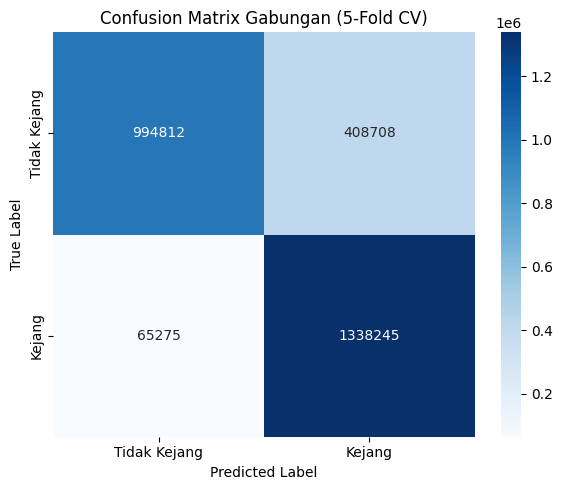

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8392
Test Accuracy  : 0.8326
Precision      : 0.9378
Recall         : 0.7124
F1 Score       : 0.8097
Confusion Matrix:
[[199964  80740]
 [ 13259 267445]]

Fold 2:
Train Accuracy : 0.8385
Test Accuracy  : 0.8316
Precision      : 0.9362
Recall         : 0.7118
F1 Score       : 0.8087
Confusion Matrix:
[[199798  80906]
 [ 13623 267081]]

Fold 3:
Train Accuracy : 0.8348
Test Accuracy  : 0.8290
Precision      : 0.9382
Recall         : 0.7045
F1 Score       : 0.8047
Confusion Matrix:
[[197746  82958]
 [ 13025 267679]]

Fold 4:
Train Accuracy : 0.8397
Test Accuracy  : 0.8326
Precision      : 0.9379
Recall         : 0.7123
F1 Score       : 0.8097
Confusion Matrix:
[[199939  80765]
 [ 13236 267468]]

Fold 5:
Train Accuracy : 0.8394
Test Accuracy  : 0.8332
Precision      : 0.9393
Recall         : 0.7125
F1 Score       : 0.8103
Confusion Matrix:
[[199990  80714]
 [ 12927 267777]]


=== Average Metrics ===
Mean Train Ac

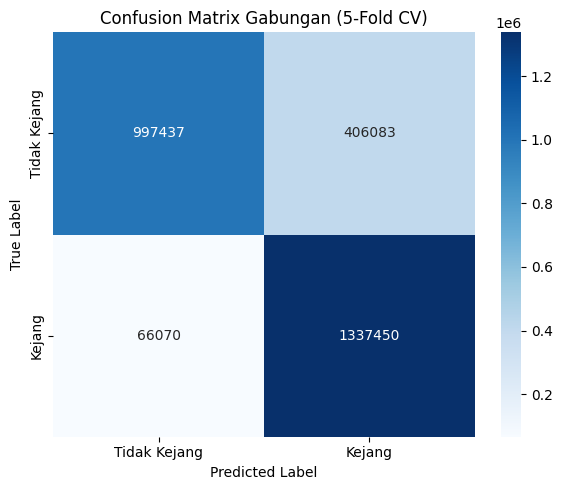

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8786
Test Accuracy  : 0.8582
Precision      : 0.9419
Recall         : 0.7636
F1 Score       : 0.8434
Confusion Matrix:
[[214344  66360]
 [ 13230 267474]]

Fold 2:
Train Accuracy : 0.8797
Test Accuracy  : 0.8593
Precision      : 0.9407
Recall         : 0.7669
F1 Score       : 0.8450
Confusion Matrix:
[[215285  65419]
 [ 13569 267135]]

Fold 3:
Train Accuracy : 0.8800
Test Accuracy  : 0.8601
Precision      : 0.9410
Recall         : 0.7685
F1 Score       : 0.8460
Confusion Matrix:
[[215716  64988]
 [ 13533 267171]]

Fold 4:
Train Accuracy : 0.8788
Test Accuracy  : 0.8581
Precision      : 0.9417
Recall         : 0.7635
F1 Score       : 0.8433
Confusion Matrix:
[[214331  66373]
 [ 13277 267427]]

Fold 5:
Train Accuracy : 0.8784
Test Accuracy  : 0.8579
Precision      : 0.9433
Recall         : 0.7616
F1 Score     

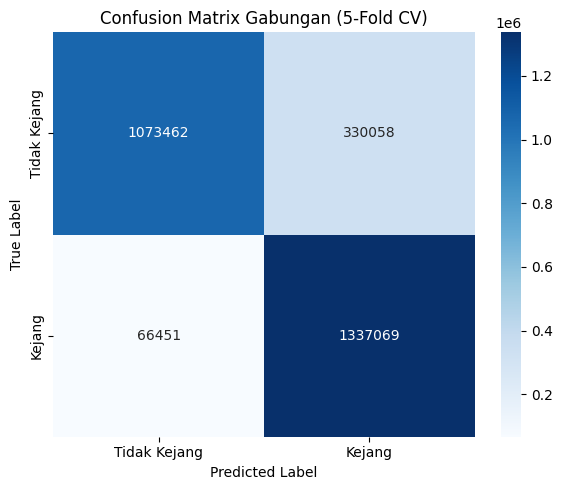

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


# CONFUSION MATRIX

Fold 1:
Train Accuracy : 0.8429
Test Accuracy  : 0.8312
Precision      : 0.9299
Recall         : 0.7163
F1 Score       : 0.8092
Confusion Matrix:
[[201071  79633]
 [ 15157 265547]]

Fold 2:
Train Accuracy : 0.8435
Test Accuracy  : 0.8316
Precision      : 0.9282
Recall         : 0.7189
F1 Score       : 0.8102
Confusion Matrix:
[[201790  78914]
 [ 15604 265100]]

Fold 3:
Train Accuracy : 0.8411
Test Accuracy  : 0.8308
Precision      : 0.9292
Recall         : 0.7163
F1 Score       : 0.8090
Confusion Matrix:
[[201057  79647]
 [ 15319 265385]]

Fold 4:
Train Accuracy : 0.8438
Test Accuracy  : 0.8320
Precision      : 0.9304
Recall         : 0.7176
F1 Score       : 0.8103
Confusion Matrix:
[[201440  79264]
 [ 15060 265644]]

Fold 5:
Train Accuracy : 0.8447
Test Accuracy  : 0.8335
Precision      : 0.9319
Recall         : 0.7196
F1 Score       : 0.8121
Confusion Matrix:
[[201996  78708]
 [ 14758 265946]]


=== Average Metrics ===
Mean Train Accuracy : 0.8432
Mean Test Accuracy  : 0.8318
Mean Pr

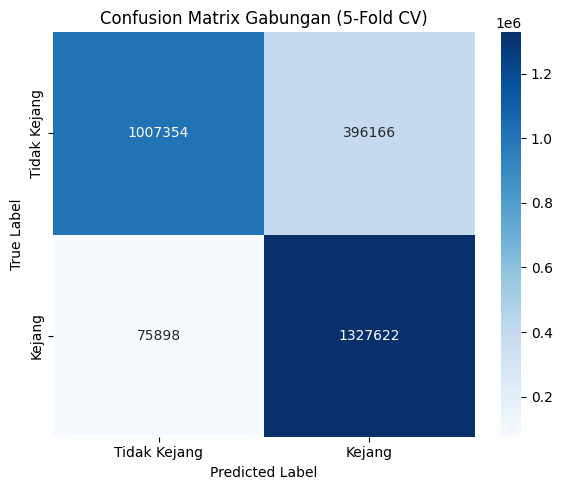

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8519
Test Accuracy  : 0.8434
Precision      : 0.9385
Recall         : 0.7349
F1 Score       : 0.8243
Confusion Matrix:
[[206284  74420]
 [ 13511 267193]]

Fold 2:
Train Accuracy : 0.8520
Test Accuracy  : 0.8437
Precision      : 0.9386
Recall         : 0.7356
F1 Score       : 0.8248
Confusion Matrix:
[[206490  74214]
 [ 13519 267185]]

Fold 3:
Train Accuracy : 0.8528
Test Accuracy  : 0.8458
Precision      : 0.9389
Recall         : 0.7397
F1 Score       : 0.8275
Confusion Matrix:
[[207629  73075]
 [ 13509 267195]]

Fold 4:
Train Accuracy : 0.8523
Test Accuracy  : 0.8436
Precision      : 0.9383
Recall         : 0.7355
F1 Score       : 0.8246
Confusion Matrix:
[[206466  74238]
 [ 13570 267134]]

Fold 5:
Train Accuracy : 0.8502
Test Accuracy  : 0.8417
Precision      : 0.9395
Recall         : 0.7304
F1 Score     

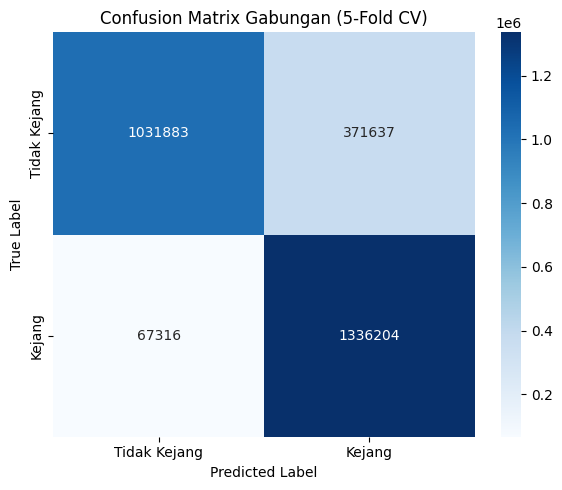

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8586
Test Accuracy  : 0.8492
Precision      : 0.9362
Recall         : 0.7495
F1 Score       : 0.8325
Confusion Matrix:
[[210385  70319]
 [ 14332 266372]]

Fold 2:
Train Accuracy : 0.8595
Test Accuracy  : 0.8510
Precision      : 0.9351
Recall         : 0.7544
F1 Score       : 0.8351
Confusion Matrix:
[[211764  68940]
 [ 14708 265996]]

Fold 3:
Train Accuracy : 0.8579
Test Accuracy  : 0.8500
Precision      : 0.9366
Recall         : 0.7508
F1 Score       : 0.8335
Confusion Matrix:
[[210752  69952]
 [ 14277 266427]]

Fold 4:
Train Accuracy : 0.8592
Test Accuracy  : 0.8494
Precision      : 0.9364
Recall         : 0.7497
F1 Score       : 0.8327
Confusion Matrix:
[[210444  70260]
 [ 14282 266422]]

Fold 5:
Train Accuracy : 0.8577
Test Accuracy  : 0.8489
Precision      : 0.9386
Recall         : 0.7466
F1 Score       : 0.8317
Confusion Matrix:
[[209578  71126]
 [ 13713 266991]]


=== Average Metrics ===
Mean Train Accuracy : 0.8586
Mean Test Accuracy  : 0.8497
Mean Pr

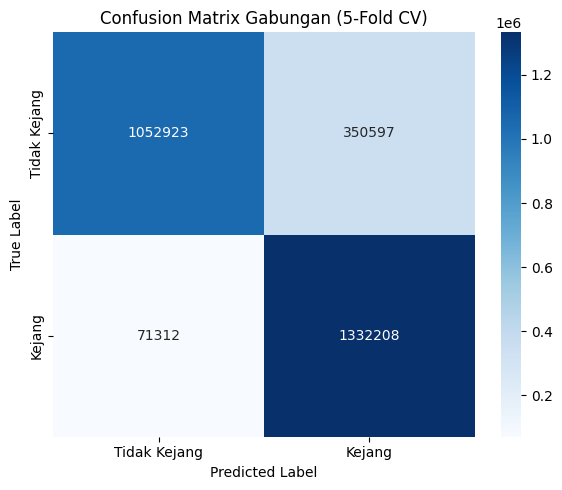

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8403
Test Accuracy  : 0.8325
Precision      : 0.9378
Recall         : 0.7124
F1 Score       : 0.8097
Confusion Matrix:
[[199967  80737]
 [ 13272 267432]]

Fold 2:
Train Accuracy : 0.8377
Test Accuracy  : 0.8299
Precision      : 0.9372
Recall         : 0.7071
F1 Score       : 0.8061
Confusion Matrix:
[[198487  82217]
 [ 13296 267408]]

Fold 3:
Train Accuracy : 0.8421
Test Accuracy  : 0.8348
Precision      : 0.9396
Recall         : 0.7156
F1 Score       : 0.8124
Confusion Matrix:
[[200867  79837]
 [ 12906 267798]]

Fold 4:
Train Accuracy : 0.8395
Test Accuracy  : 0.8310
Precision      : 0.9385
Recall         : 0.7085
F1 Score       : 0.8075
Confusion Matrix:
[[198888  81816]
 [ 13034 267670]]

Fold 5:
Train Accuracy : 0.8416
Test Accuracy  : 0.8339
Precision      : 0.9392
Recall         : 0.7140
F1 Score     

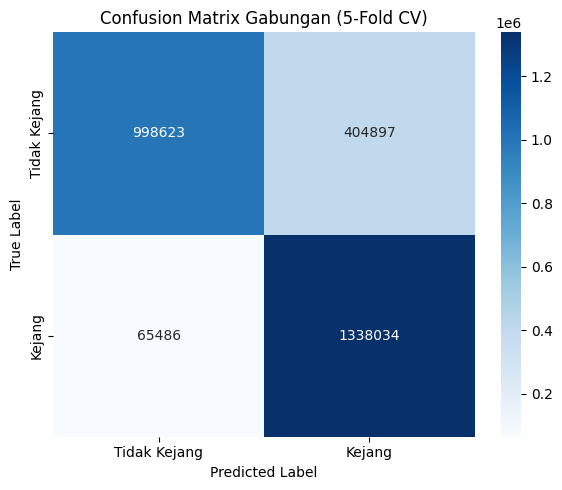

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Simpan hasil
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Untuk confusion matrix gabungan
all_true = []
all_pred = []

# Loop tiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Simpan prediksi untuk confusion matrix gabungan
    all_true.extend(y_test)
    all_pred.extend(y_test_pred)

    # Evaluasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_test, y_test_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Cetak hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test Accuracy  : {test_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Rata-rata skor
print("\n=== Average Metrics ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Test Accuracy  : {np.mean(test_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# Buat confusion matrix gabungan
cm_total = confusion_matrix(all_true, all_pred)
print("\n=== Confusion Matrix Gabungan (Semua Fold) ===")
print(cm_total)

# Visualisasi Confusion Matrix Gabungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (5-Fold CV)")
plt.tight_layout()
plt.show()


# CONFUSSION MATRIX TRAIN DAN TEST

Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 1.0000
Val Accuracy   : 0.9472
Precision      : 0.9435
Recall         : 0.9512
F1 Score       : 0.9474
Confusion Matrix:
[[117   6]
 [  7 116]]

Fold 2:
Train Accuracy : 1.0000
Val Accuracy   : 0.9553
Precision      : 0.9308
Recall         : 0.9837
F1 Score       : 0.9565
Confusion Matrix:
[[121   2]
 [  9 114]]

Fold 3:
Train Accuracy : 1.0000
Val Accuracy   : 0.9228
Precision      : 0.9127
Recall         : 0.9350
F1 Score       : 0.9237
Confusion Matrix:
[[115   8]
 [ 11 112]]

Fold 4:
Train Accuracy : 1.0000
Val Accuracy   : 0.9184
Precision      : 0.8992
Recall         : 0.9431
F1 Score       : 0.9206
Confusion Matrix:
[[116   7]
 [ 13 109]]

Fold 5:
Train Accuracy : 1.0000
Val Accuracy   : 0.9102
Precision      : 0.9386
Recall         : 0.8770
F1 Score       : 0.9068
Confusion Matrix:
[[107  15]
 [  7 116]]


=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===
Mean Train Accuracy : 1.0000
Mean Val Accu

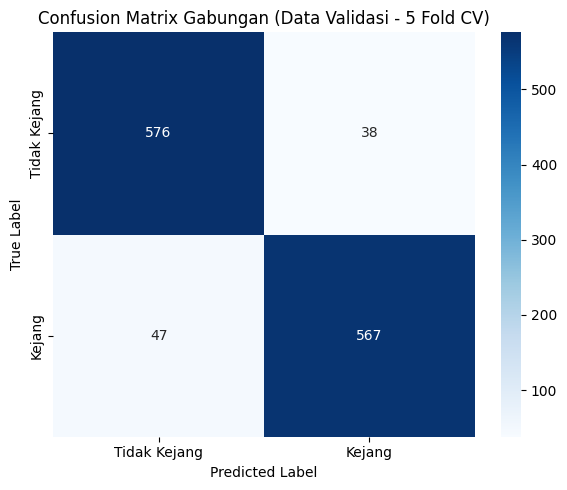


=== Evaluasi Model Terhadap Seluruh Data Latih ===
Train Accuracy : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1 Score       : 1.0000
Confusion Matrix:
[[614   0]
 [  0 614]]

=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.9481
Precision      : 0.9367
Recall         : 0.9610
F1 Score       : 0.9487
Confusion Matrix:
[[148   6]
 [ 10 144]]


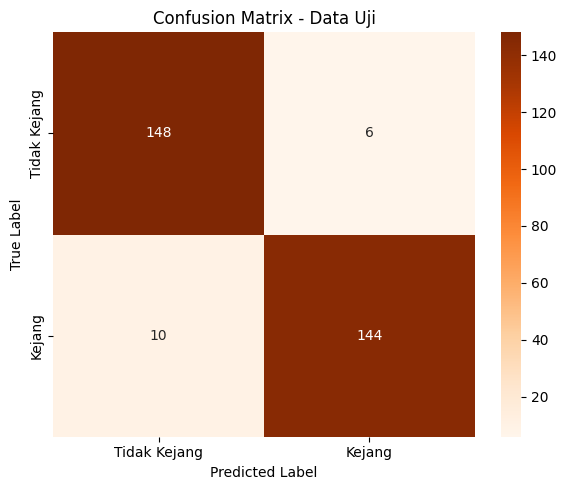

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb16_16.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

# 🔁 Evaluasi model pada seluruh data latih setelah retraining
y_train_final = model.predict(X_train_full)

train_final_acc = accuracy_score(y_train_full, y_train_final)
train_final_prec = precision_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_rec = recall_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_f1 = f1_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_cm = confusion_matrix(y_train_full, y_train_final)

print("\n=== Evaluasi Model Terhadap Seluruh Data Latih ===")
print(f"Train Accuracy : {train_final_acc:.4f}")
print(f"Precision      : {train_final_prec:.4f}")
print(f"Recall         : {train_final_rec:.4f}")
print(f"F1 Score       : {train_final_f1:.4f}")
print(f"Confusion Matrix:\n{train_final_cm}")

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8412
Val Accuracy   : 0.8320
Precision      : 0.9385
Recall         : 0.7105
F1 Score       : 0.8088
Confusion Matrix:
[[159563  65000]
 [ 10450 214114]]

Fold 2:
Train Accuracy : 0.8417
Val Accuracy   : 0.8331
Precision      : 0.9400
Recall         : 0.7116
F1 Score       : 0.8100
Confusion Matrix:
[[159799  64765]
 [ 10207 214356]]

Fold 3:
Train Accuracy : 0.8421
Val Accuracy   : 0.8321
Precision      : 0.9364
Recall         : 0.7126
F1 Score       : 0.8093
Confusion Matrix:
[[160014  64549]
 [ 10862 213701]]

Fold 4:
Train Accuracy : 0.8374
Val Accuracy   : 0.8294
Precision      : 0.9374
Recall         : 0.7059
F1 Score       : 0.8054
Confusion Matrix:
[[158525  66038]
 [ 10584 213979]]

Fold 5:
Train Accuracy : 0.8413
Val Accuracy   : 0.8314
Precision      : 0.9370
Recall         : 0.7106
F1 Score     

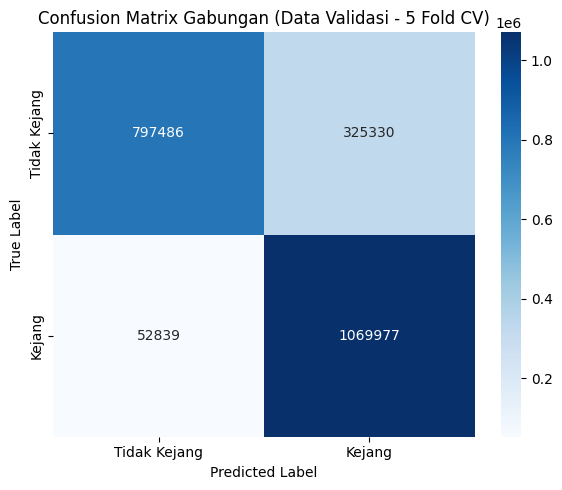


=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8323
Precision      : 0.9385
Recall         : 0.7112
F1 Score       : 0.8092
Confusion Matrix:
[[199628  81076]
 [ 13071 267633]]


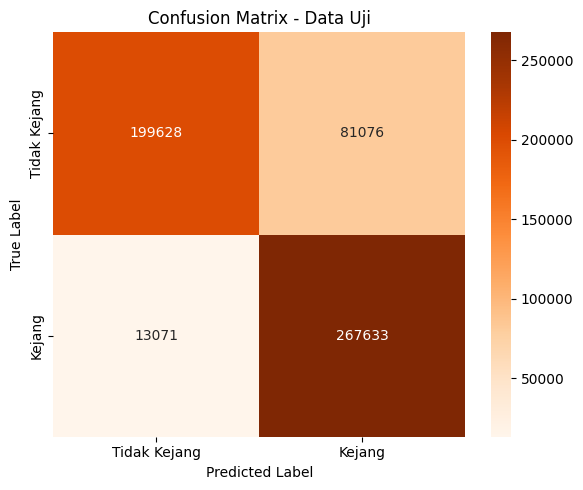

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()



=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[ 997114  406406]
 [  65910 1337610]]


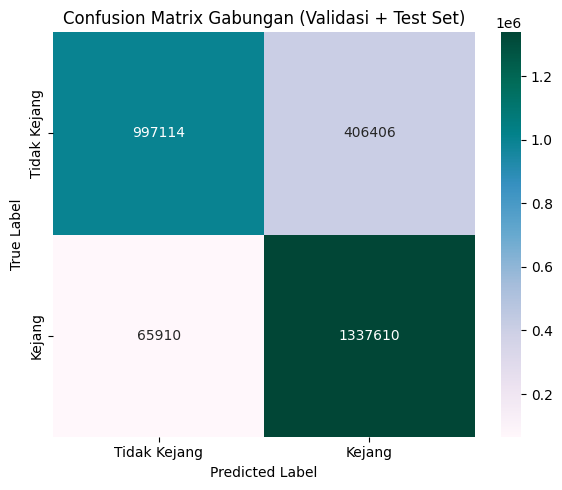

In [ ]:
# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8521
Val Accuracy   : 0.8423
Precision      : 0.9388
Recall         : 0.7323
F1 Score       : 0.8228
Confusion Matrix:
[[164448  60115]
 [ 10722 213842]]

Fold 2:
Train Accuracy : 0.8518
Val Accuracy   : 0.8424
Precision      : 0.9403
Recall         : 0.7312
F1 Score       : 0.8227
Confusion Matrix:
[[164206  60358]
 [ 10426 214137]]

Fold 3:
Train Accuracy : 0.8540
Val Accuracy   : 0.8436
Precision      : 0.9373
Recall         : 0.7365
F1 Score       : 0.8249
Confusion Matrix:
[[165399  59164]
 [ 11065 213498]]

Fold 4:
Train Accuracy : 0.8531
Val Accuracy   : 0.8444
Precision      : 0.9384
Recall         : 0.7372
F1 Score       : 0.8257
Confusion Matrix:
[[165548  59015]
 [ 10861 213702]]

Fold 5:
Train Accuracy : 0.8552
Val Accuracy   : 0.8454
Precision      : 0.9379
Recall         : 0.7398
F1 Score       : 0.8272
Confusion Matrix:
[[166139  58424]
 [ 11008 213555]]


=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===
Mean Train Accuracy : 0.8533
Mean 

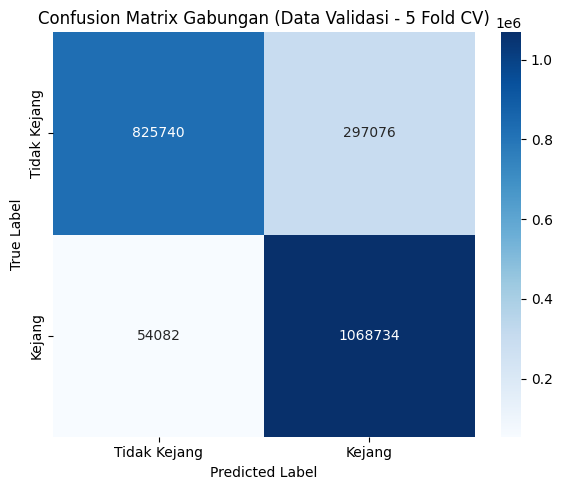


=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8424
Precision      : 0.9397
Recall         : 0.7317
F1 Score       : 0.8227
Confusion Matrix:
[[205378  75326]
 [ 13178 267526]]


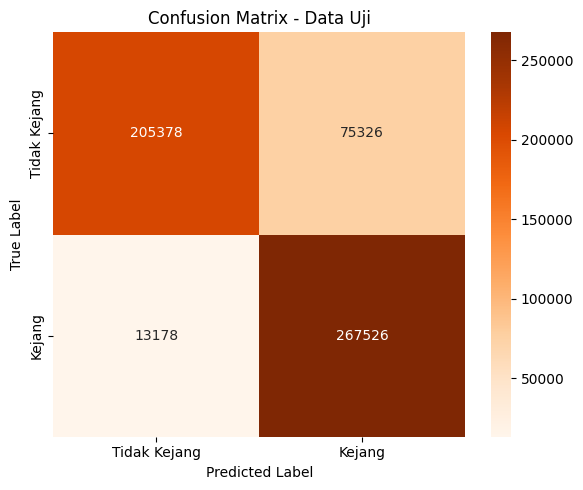

In [ ]:

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()



=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[1031118  372402]
 [  67260 1336260]]


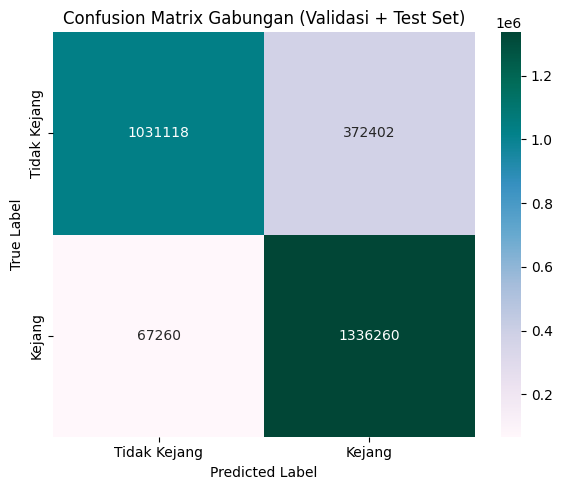

In [ ]:
# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8599
Val Accuracy   : 0.8493
Precision      : 0.9374
Recall         : 0.7485
F1 Score       : 0.8324
Confusion Matrix:
[[168081  56482]
 [ 11217 213347]]

Fold 2:
Train Accuracy : 0.8590
Val Accuracy   : 0.8488
Precision      : 0.9362
Recall         : 0.7486
F1 Score       : 0.8320
Confusion Matrix:
[[168106  56458]
 [ 11455 213108]]

Fold 3:
Train Accuracy : 0.8593
Val Accuracy   : 0.8485
Precision      : 0.9354
Recall         : 0.7487
F1 Score       : 0.8317
Confusion Matrix:
[[168126  56437]
 [ 11606 212957]]

Fold 4:
Train Accuracy : 0.8580
Val Accuracy   : 0.8487
Precision      : 0.9363
Recall         : 0.7483
F1 Score       : 0.8318
Confusion Matrix:
[[168032  56531]
 [ 11438 213125]]

Fold 5:
Train Accuracy : 0.8588
Val Accuracy   : 0.8485
Precision      : 0.9377
Recall         : 0.7466
F1 Score       : 0.8313
Confusion Matrix:
[[167650  56913]
 [ 11143 213420]]


=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===
Mean Train Accuracy : 0.8590
Mean 

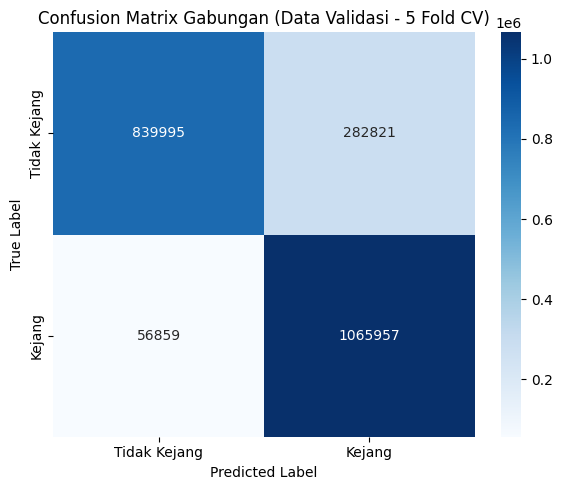


=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8479
Precision      : 0.9378
Recall         : 0.7452
F1 Score       : 0.8305
Confusion Matrix:
[[209171  71533]
 [ 13862 266842]]


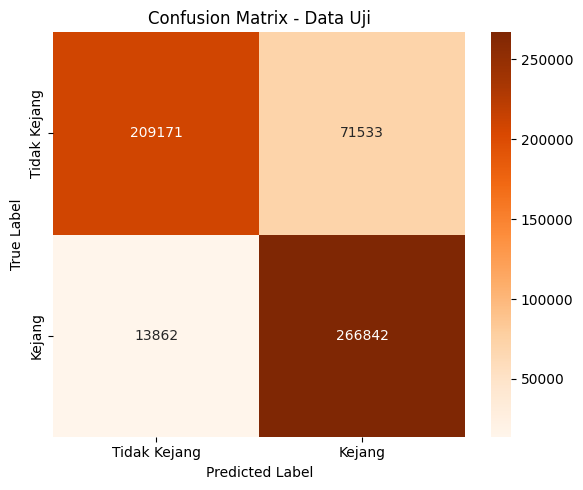

In [ ]:

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG (1).csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()



=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[1049166  354354]
 [  70721 1332799]]


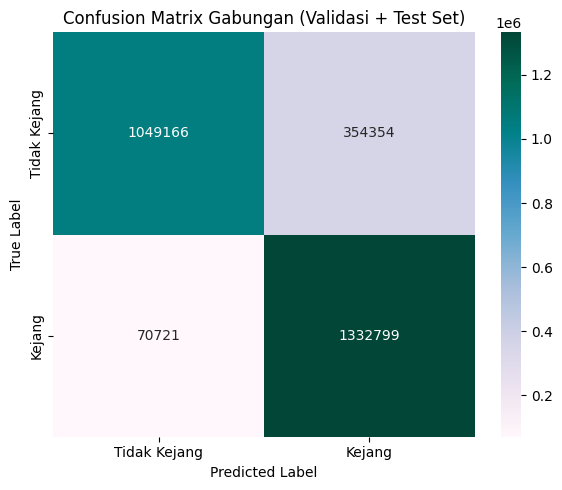

In [ ]:
# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()


Fold 1:
Train Accuracy : 0.8468
Val Accuracy   : 0.8336
Precision      : 0.9290
Recall         : 0.7225
F1 Score       : 0.8128
Confusion Matrix:
[[162246  62317]
 [ 12405 212159]]

Fold 2:
Train Accuracy : 0.8417
Val Accuracy   : 0.8289
Precision      : 0.9298
Recall         : 0.7115
F1 Score       : 0.8062
Confusion Matrix:
[[159786  64778]
 [ 12060 212503]]

Fold 3:
Train Accuracy : 0.8452
Val Accuracy   : 0.8318
Precision      : 0.9285
Recall         : 0.7190
F1 Score       : 0.8105
Confusion Matrix:
[[161472  63091]
 [ 12431 212132]]

Fold 4:
Train Accuracy : 0.8435
Val Accuracy   : 0.8317
Precision      : 0.9299
Recall         : 0.7175
F1 Score       : 0.8100
Confusion Matrix:
[[161129  63434]
 [ 12148 212415]]

Fold 5:
Train Accuracy : 0.8428
Val Accuracy   : 0.8300
Precision      : 0.9324
Recall         : 0.7117
F1 Score       : 0.8072
Confusion Matrix:
[[159817  64746]
 [ 11587 212976]]


=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===
Mean Train Accuracy : 0.8440
Mean 

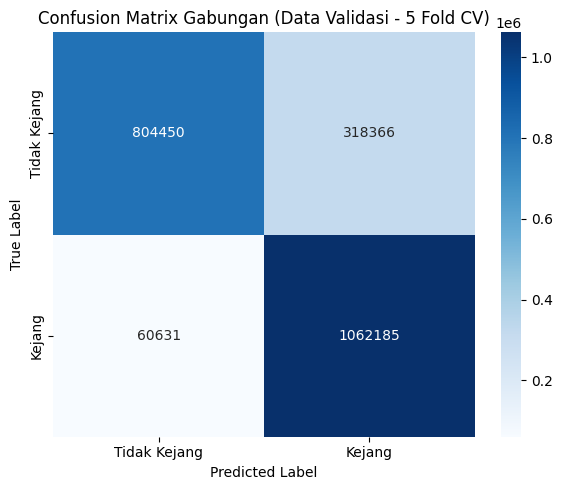


=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8313
Precision      : 0.9318
Recall         : 0.7148
F1 Score       : 0.8090
Confusion Matrix:
[[200656  80048]
 [ 14687 266017]]


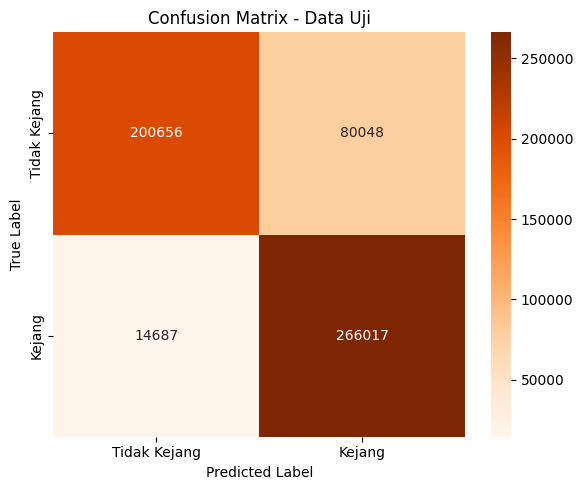

In [ ]:

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()



=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[1005106  398414]
 [  75318 1328202]]


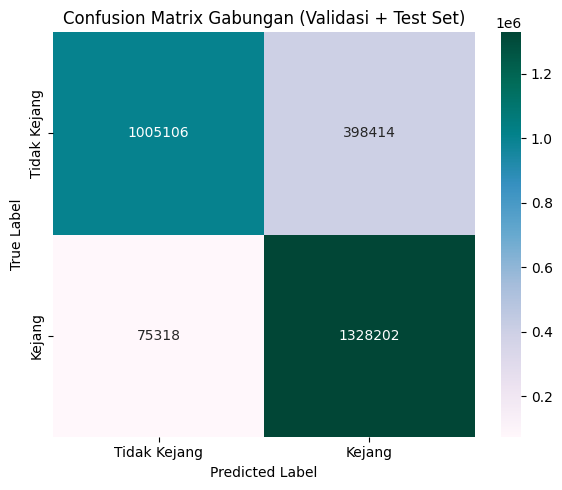

In [ ]:
# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()


# TUNNING PARAMETER PASIEN

## RECTANGULAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB01 RECTANGULAR.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Mounted at /content/drive
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9709238740181836
Testing Accuracy : 0.9413194291016747
Confusion Matrix:
 [[10499   817]
 [  511 10804]]

Fold 2
Training Accuracy: 0.9721280144938743
Testing Accuracy : 0.9475056338650524
Confusion Matrix:
 [[10602   713]
 [  475 10841]]

Fold 3
Training Accuracy: 0.9718190053246725
Testing Accuracy : 0.9471498011489173
Confusion Matrix:
 [[10572   743]
 [  453 10862]]

Fold 4
Training Accuracy: 0.971366076754822
Testing Accuracy : 0.9444542642509942
Confusion Matrix:
 [[10531   784]
 [  473 10842]]

Fold 5
Training Accuracy: 0.9699851969686927
Testing Accuracy : 0.9388864339372515
Confusion Matrix:
 [[10466   849]
 [  534 10781]]

Average Training Accuracy: 0.9712444335120489
Average Testing Accuracy : 0.9438631124607781


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB02 RECTANGULAR.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.990319375443577
Testing Accuracy : 0.9618485295787442
Confusion Matrix:
 [[4219  185]
 [ 151 4252]]

Fold 2
Training Accuracy: 0.9914833215046132
Testing Accuracy : 0.9596911547632565
Confusion Matrix:
 [[4231  172]
 [ 183 4221]]

Fold 3
Training Accuracy: 0.9910577414409811
Testing Accuracy : 0.9629797865091982
Confusion Matrix:
 [[4234  169]
 [ 157 4246]]

Fold 4
Training Accuracy: 0.9917106682564015
Testing Accuracy : 0.9592323415852828
Confusion Matrix:
 [[4241  162]
 [ 197 4206]]

Fold 5
Training Accuracy: 0.9915687276443536
Testing Accuracy : 0.9620713150124914
Confusion Matrix:
 [[4251  152]
 [ 182 4221]]

Average Training Accuracy: 0.9912279668579853
Average Testing A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB03 RECTANGULAR.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9517181066209962
Testing Accuracy : 0.9380556770150124
Confusion Matrix:
 [[9569  723]
 [ 552 9739]]

Fold 2
Training Accuracy: 0.952932745448141
Testing Accuracy : 0.9377641743186125
Confusion Matrix:
 [[9527  764]
 [ 517 9775]]

Fold 3
Training Accuracy: 0.9519130329163124
Testing Accuracy : 0.9351374987853465
Confusion Matrix:
 [[9553  738]
 [ 597 9694]]

Fold 4
Training Accuracy: 0.9522895663792056
Testing Accuracy : 0.9403362161111651
Confusion Matrix:
 [[9624  667]
 [ 561 9730]]

Fold 5
Training Accuracy: 0.9517186930644965
Testing Accuracy : 0.9360606355067534
Confusion Matrix:
 [[9526  765]
 [ 551 9740]]

Average Training Accuracy: 0.9521144288858304
Average Testing A

## BLACKMAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB03 BLACKMAN.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9990890208796415
Testing Accuracy : 0.9553029198853423
Confusion Matrix:
 [[9884  408]
 [ 512 9779]]

Fold 2
Training Accuracy: 0.9991133136561844
Testing Accuracy : 0.9557401739299421
Confusion Matrix:
 [[9898  393]
 [ 518 9774]]

Fold 3
Training Accuracy: 0.9991376169075671
Testing Accuracy : 0.9576328831017393
Confusion Matrix:
 [[9937  354]
 [ 518 9773]]

Fold 4
Training Accuracy: 0.9991619093890441
Testing Accuracy : 0.9577786415314352
Confusion Matrix:
 [[9926  365]
 [ 504 9787]]

Fold 5
Training Accuracy: 0.9991740556297826
Testing Accuracy : 0.955057817510446
Confusion Matrix:
 [[9883  408]
 [ 517 9774]]

Average Training Accuracy: 0.9991351832924439
Average Testing A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB02 BLACKMAN.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9788502484031227
Testing Accuracy : 0.9560576813898035
Confusion Matrix:
 [[4209  195]
 [ 192 4211]]

Fold 2
Training Accuracy: 0.979389638041164
Testing Accuracy : 0.9563983195185648
Confusion Matrix:
 [[4224  179]
 [ 205 4199]]

Fold 3
Training Accuracy: 0.9798444330891954
Testing Accuracy : 0.9574153985918692
Confusion Matrix:
 [[4215  188]
 [ 187 4216]]

Fold 4
Training Accuracy: 0.9811218985976268
Testing Accuracy : 0.9566204860322507
Confusion Matrix:
 [[4237  166]
 [ 216 4187]]

Fold 5
Training Accuracy: 0.9800431499460626
Testing Accuracy : 0.9582103111514876
Confusion Matrix:
 [[4229  174]
 [ 194 4209]]

Average Training Accuracy: 0.9798498736154343
Average Testing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB01 BLACKMAN.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9866218888434728
Testing Accuracy : 0.9509964208386726
Confusion Matrix:
 [[10715   601]
 [  508 10807]]

Fold 2
Training Accuracy: 0.9869643508136233
Testing Accuracy : 0.9558570102956122
Confusion Matrix:
 [[10755   560]
 [  439 10877]]

Fold 3
Training Accuracy: 0.9864010958661983
Testing Accuracy : 0.9551480335837385
Confusion Matrix:
 [[10741   574]
 [  441 10874]]

Fold 4
Training Accuracy: 0.9865999425554008
Testing Accuracy : 0.9539991162174105
Confusion Matrix:
 [[10725   590]
 [  451 10864]]

Fold 5
Training Accuracy: 0.9862906254833079
Testing Accuracy : 0.9498895271763146
Confusion Matrix:
 [[10725   590]
 [  544 10771]]

Average Training Accuracy: 0.986575580712

## HAMMING (blm selesai)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB01 HAMMING.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9775963588559561
Testing Accuracy : 0.9484777517564403
Confusion Matrix:
 [[10647   669]
 [  497 10818]]

Fold 2
Training Accuracy: 0.977066095160239
Testing Accuracy : 0.9527639079139234
Confusion Matrix:
 [[10718   597]
 [  472 10844]]

Fold 3
Training Accuracy: 0.9773204303926117
Testing Accuracy : 0.9522315510384446
Confusion Matrix:
 [[10685   630]
 [  451 10864]]

Fold 4
Training Accuracy: 0.9768564547844723
Testing Accuracy : 0.949977905435263
Confusion Matrix:
 [[10651   664]
 [  468 10847]]

Fold 5
Training Accuracy: 0.9775192770818144
Testing Accuracy : 0.9476800707026072
Confusion Matrix:
 [[10662   653]
 [  531 10784]]

Average Training Accuracy: 0.97727172325501

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/PASIEN CHB02 HAMMING.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Fold 1
Training Accuracy: 0.9860326472675657
Testing Accuracy : 0.9623027137504258
Confusion Matrix:
 [[4230  174]
 [ 158 4245]]

Fold 2
Training Accuracy: 0.9868275372604685
Testing Accuracy : 0.9610537072783013
Confusion Matrix:
 [[4236  167]
 [ 176 4228]]

Fold 3
Training Accuracy: 0.9862601487537614
Testing Accuracy : 0.9616170792641381
Confusion Matrix:
 [[4230  173]
 [ 165 4238]]

Fold 4
Training Accuracy: 0.9873956736501448
Testing Accuracy : 0.9607086077674313
Confusion Matrix:
 [[4254  149]
 [ 197 4206]]

Fold 5
Training Accuracy: 0.9860614318968943
Testing Accuracy : 0.9641153758800818
Confusion Matrix:
 [[4245  158]
 [ 158 4245]]

Average Training Accuracy: 0.9865154877657669
Average Testing Accuracy : 0.9619594967880758


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB03 HAMMING.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Mounted at /content/drive
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9872948778680659
Testing Accuracy : 0.9572462711946752
Confusion Matrix:
 [[9892  400]
 [ 480 9811]]

Fold 2
Training Accuracy: 0.9869912181612798
Testing Accuracy : 0.9576835252392751
Confusion Matrix:
 [[9893  398]
 [ 473 9819]]

Fold 3
Training Accuracy: 0.9867848900765214
Testing Accuracy : 0.9585560198231464
Confusion Matrix:
 [[9933  358]
 [ 495 9796]]

Fold 4
Training Accuracy: 0.9869427912061217
Testing Accuracy : 0.9610339131279759
Confusion Matrix:
 [[9937  354]
 [ 448 9843]]

Fold 5
Training Accuracy: 0.9868820600024293
Testing Accuracy : 0.9577300553882033
Confusion Matrix:
 [[9901  390]
 [ 480 9811]]

Average Training Accuracy: 0.9869791674628836
Average Testing Accuracy : 0.9584499569546552


## HANNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB01 HANNING.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Mounted at /content/drive
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Fold 1
Training Accuracy: 0.9743263993990344
Testing Accuracy : 0.9479916928107464
Confusion Matrix:
 [[10633   683]
 [  494 10821]]

Fold 2
Training Accuracy: 0.974514201124601
Testing Accuracy : 0.9511289823693164
Confusion Matrix:
 [[10671   644]
 [  462 10854]]

Fold 3
Training Accuracy: 0.9743487770928614
Testing Accuracy : 0.9515687140963323
Confusion Matrix:
 [[10674   641]
 [  455 10860]]

Fold 4
Training Accuracy: 0.97424935374826
Testing Accuracy : 0.948828988068935
Confusion Matrix:
 [[10634   681]
 [  477 10838]]

Fold 5
Training Accuracy: 0.9749121760456022
Testing Accuracy : 0.9465753424657535
Confusion Matrix:
 [[10638   677]
 [  532 10783]]

Average Training Accuracy: 0.9744701814820719
Average Testing Accuracy : 0.9492187439622167


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/PASIEN CHB02 HANNING.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9869978708303762
Testing Accuracy : 0.9638923583513115
Confusion Matrix:
 [[4246  158]
 [ 160 4243]]

Fold 2
Training Accuracy: 0.9869694819020582
Testing Accuracy : 0.9616214374929034
Confusion Matrix:
 [[4245  158]
 [ 180 4224]]

Fold 3
Training Accuracy: 0.9864020893658093
Testing Accuracy : 0.9620713150124914
Confusion Matrix:
 [[4239  164]
 [ 170 4233]]

Fold 4
Training Accuracy: 0.9874808380173735
Testing Accuracy : 0.960935725641608
Confusion Matrix:
 [[4257  146]
 [ 198 4205]]

Fold 5
Training Accuracy: 0.9868846874467723
Testing Accuracy : 0.9646831705655236
Confusion Matrix:
 [[4255  148]
 [ 163 4240]]

Average Training Accuracy: 0.9869469935124779
Average Testing Accuracy : 0.9626408014127676


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
T_data = pd.read_csv("/content/drive/MyDrive/TA/PASIEN CHB03 HANNING.csv")

# Pisahkan fitur (X) dan label (y)
X = T_data.drop(['frekuensi', 'seizure'], axis=1)
y = T_data['seizure']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning
grid_search.fit(X, y)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Gunakan parameter terbaik untuk evaluasi dengan StratifiedKFold
train_accuracies = []
test_accuracies = []
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada data latih dan uji
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Akurasi
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    # Simpan hasil
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    conf_matrices.append(cm)

    # Cetak hasil per fold
    print(f"\nFold {fold}")
    print("Training Accuracy:", acc_train)
    print("Testing Accuracy :", acc_test)
    print("Confusion Matrix:\n", cm)

# Rata-rata akurasi
print("\nAverage Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy :", np.mean(test_accuracies))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Fold 1
Training Accuracy: 0.9986274581253264
Testing Accuracy : 0.9578292765874751
Confusion Matrix:
 [[9894  398]
 [ 470 9821]]

Fold 2
Training Accuracy: 0.9986031653487836
Testing Accuracy : 0.9583151144148083
Confusion Matrix:
 [[9908  383]
 [ 475 9817]]

Fold 3
Training Accuracy: 0.9987610834446738
Testing Accuracy : 0.9593333981148576
Confusion Matrix:
 [[9941  350]
 [ 487 9804]]

Fold 4
Training Accuracy: 0.9987003522409814
Testing Accuracy : 0.9623943251384706
Confusion Matrix:
 [[9948  343]
 [ 431 9860]]

Fold 5
Training Accuracy: 0.9988096684076279
Testing Accuracy : 0.9586531921096103
Confusion Matrix:
 [[9907  384]
 [ 467 9824]]

Average Training Accuracy: 0.9987003455134786
Average Testing 

# CONFUSSION MATRIX TRAIN DAN TEST
akurasi semua data latih

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8412
Val Accuracy   : 0.8320
Precision      : 0.9385
Recall         : 0.7105
F1 Score       : 0.8088
Confusion Matrix:
[[159563  65000]
 [ 10450 214114]]

Fold 2:
Train Accuracy : 0.8417
Val Accuracy   : 0.8331
Precision      : 0.9400
Recall         : 0.7116
F1 Score       : 0.8100
Confusion Matrix:
[[159799  64765]
 [ 10207 214356]]

Fold 3:
Train Accuracy : 0.8421
Val Accuracy   : 0.8321
Precision      : 0.9364
Recall         : 0.7126
F1 Score       : 0.8093
Confusion Matrix:
[[160014  64549]
 [ 10862 213701]]

Fold 4:
Train Accuracy : 0.8374
Val Accuracy   : 0.8294
Precision      : 0.9374
Recall         : 0.7059
F1 Score       : 0.8054
Confusion Matrix:
[[158525  66038]
 [ 10584 213979]]

Fold 5:
Train Accuracy : 0.8413
Val Accuracy   : 0.8314
Precision      : 0.9370
Recall         : 0.7106
F1 Score     

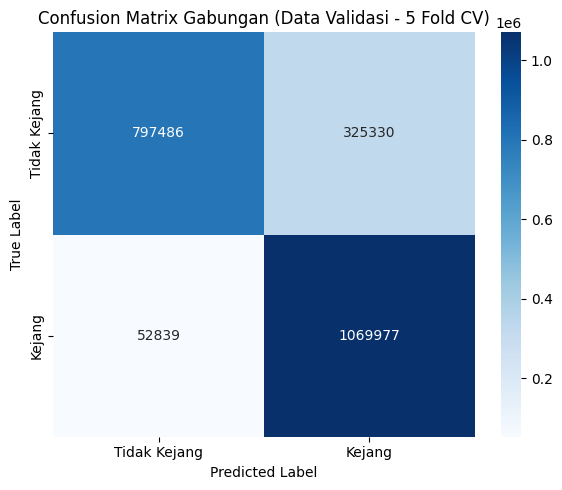


=== Evaluasi Model Terhadap Seluruh Data Latih ===
Train Accuracy : 0.8399
Precision      : 0.9509
Recall         : 0.7169
F1 Score       : 0.8175
Confusion Matrix:
[[ 804991  317825]
 [  41594 1081222]]

=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8323
Precision      : 0.9385
Recall         : 0.7112
F1 Score       : 0.8092
Confusion Matrix:
[[199628  81076]
 [ 13071 267633]]


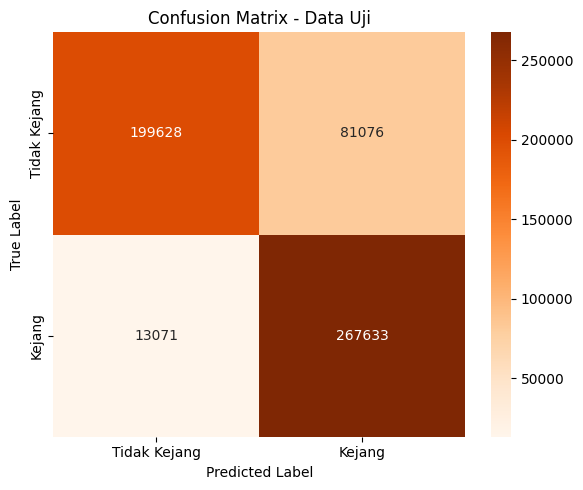


=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[ 997114  406406]
 [  65910 1337610]]


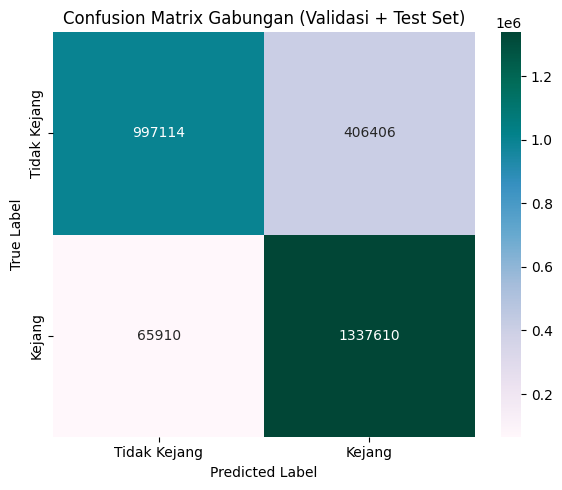

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

# 🔁 Evaluasi model pada seluruh data latih setelah retraining
y_train_final = model.predict(X_train_full)

train_final_acc = accuracy_score(y_train_full, y_train_final)
train_final_prec = precision_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_rec = recall_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_f1 = f1_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_cm = confusion_matrix(y_train_full, y_train_final)

print("\n=== Evaluasi Model Terhadap Seluruh Data Latih ===")
print(f"Train Accuracy : {train_final_acc:.4f}")
print(f"Precision      : {train_final_prec:.4f}")
print(f"Recall         : {train_final_rec:.4f}")
print(f"F1 Score       : {train_final_f1:.4f}")
print(f"Confusion Matrix:\n{train_final_cm}")

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8521
Val Accuracy   : 0.8423
Precision      : 0.9388
Recall         : 0.7323
F1 Score       : 0.8228
Confusion Matrix:
[[164448  60115]
 [ 10722 213842]]

Fold 2:
Train Accuracy : 0.8518
Val Accuracy   : 0.8424
Precision      : 0.9403
Recall         : 0.7312
F1 Score       : 0.8227
Confusion Matrix:
[[164206  60358]
 [ 10426 214137]]

Fold 3:
Train Accuracy : 0.8540
Val Accuracy   : 0.8436
Precision      : 0.9373
Recall         : 0.7365
F1 Score       : 0.8249
Confusion Matrix:
[[165399  59164]
 [ 11065 213498]]

Fold 4:
Train Accuracy : 0.8531
Val Accuracy   : 0.8444
Precision      : 0.9384
Recall         : 0.7372
F1 Score       : 0.8257
Confusion Matrix:
[[165548  59015]
 [ 10861 213702]]

Fold 5:
Train Accuracy : 0.8552
Val Accuracy   : 0.8454
Precision      : 0.9379
Recall         : 0.7398
F1 Score     

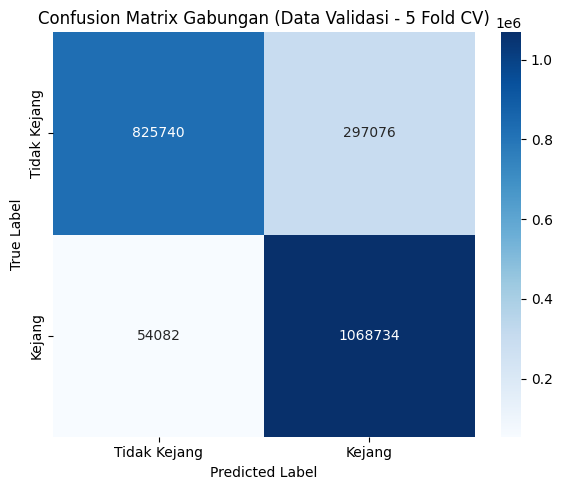


=== Evaluasi Model Terhadap Seluruh Data Latih ===
Train Accuracy : 0.8505
Precision      : 0.9522
Recall         : 0.7380
F1 Score       : 0.8315
Confusion Matrix:
[[ 828622  294194]
 [  41580 1081236]]

=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8424
Precision      : 0.9397
Recall         : 0.7317
F1 Score       : 0.8227
Confusion Matrix:
[[205378  75326]
 [ 13178 267526]]


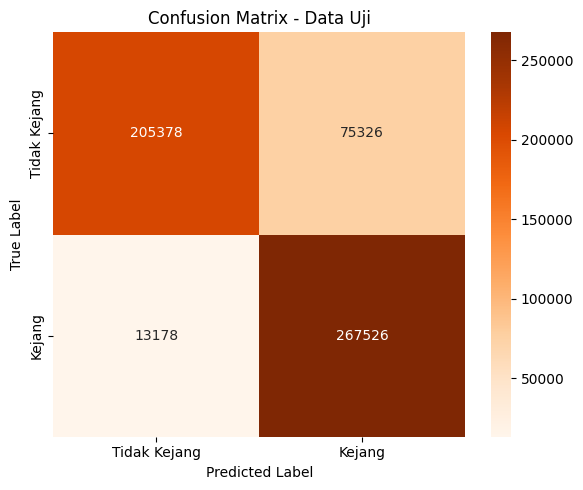


=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[1031118  372402]
 [  67260 1336260]]


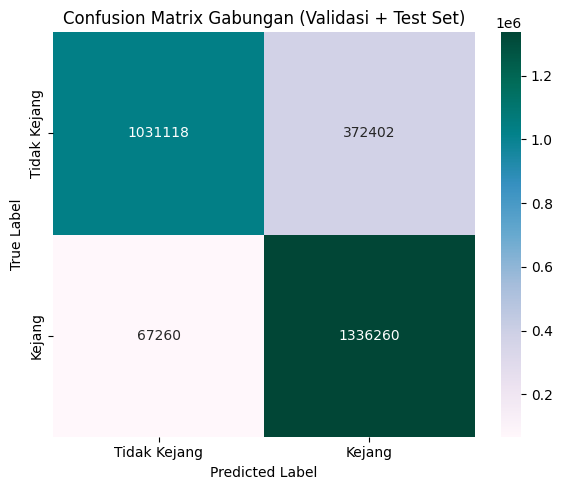

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

# 🔁 Evaluasi model pada seluruh data latih setelah retraining
y_train_final = model.predict(X_train_full)

train_final_acc = accuracy_score(y_train_full, y_train_final)
train_final_prec = precision_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_rec = recall_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_f1 = f1_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_cm = confusion_matrix(y_train_full, y_train_final)

print("\n=== Evaluasi Model Terhadap Seluruh Data Latih ===")
print(f"Train Accuracy : {train_final_acc:.4f}")
print(f"Precision      : {train_final_prec:.4f}")
print(f"Recall         : {train_final_rec:.4f}")
print(f"F1 Score       : {train_final_f1:.4f}")
print(f"Confusion Matrix:\n{train_final_cm}")

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8599
Val Accuracy   : 0.8493
Precision      : 0.9374
Recall         : 0.7485
F1 Score       : 0.8324
Confusion Matrix:
[[168081  56482]
 [ 11217 213347]]

Fold 2:
Train Accuracy : 0.8590
Val Accuracy   : 0.8488
Precision      : 0.9362
Recall         : 0.7486
F1 Score       : 0.8320
Confusion Matrix:
[[168106  56458]
 [ 11455 213108]]

Fold 3:
Train Accuracy : 0.8593
Val Accuracy   : 0.8485
Precision      : 0.9354
Recall         : 0.7487
F1 Score       : 0.8317
Confusion Matrix:
[[168126  56437]
 [ 11606 212957]]

Fold 4:
Train Accuracy : 0.8580
Val Accuracy   : 0.8487
Precision      : 0.9363
Recall         : 0.7483
F1 Score       : 0.8318
Confusion Matrix:
[[168032  56531]
 [ 11438 213125]]

Fold 5:
Train Accuracy : 0.8588
Val Accuracy   : 0.8485
Precision      : 0.9377
Recall         : 0.7466
F1 Score       : 0.8313
Confusion Matrix:
[[167650  56913]
 [ 11143 213420]]


=== Rata-Rata Evaluasi dari 5-Fold CV

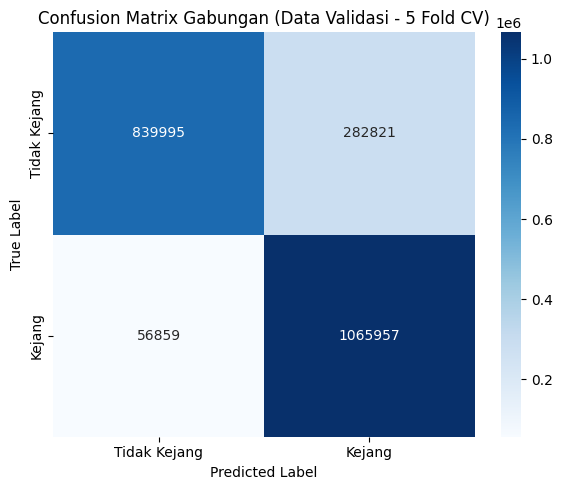


=== Evaluasi Model Terhadap Seluruh Data Latih ===
Train Accuracy : 0.8565
Precision      : 0.9509
Recall         : 0.7518
F1 Score       : 0.8397
Confusion Matrix:
[[ 844103  278713]
 [  43625 1079191]]

=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8479
Precision      : 0.9378
Recall         : 0.7452
F1 Score       : 0.8305
Confusion Matrix:
[[209171  71533]
 [ 13862 266842]]


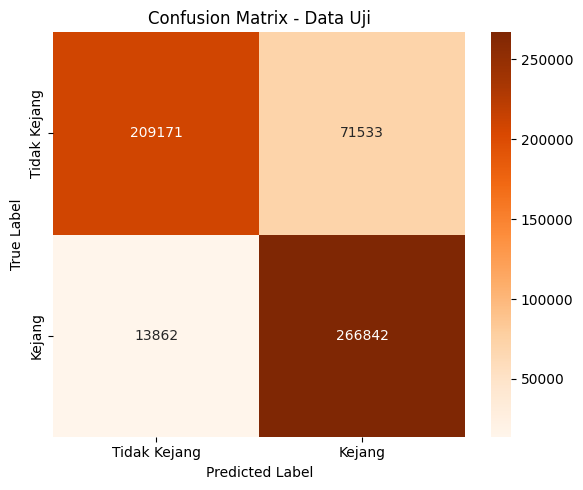


=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[1049166  354354]
 [  70721 1332799]]


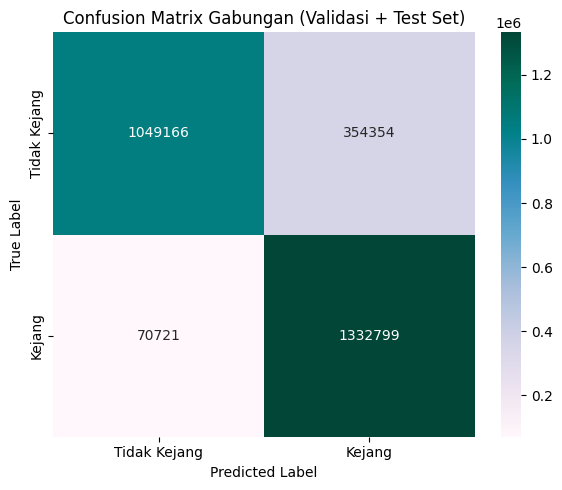

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

# 🔁 Evaluasi model pada seluruh data latih setelah retraining
y_train_final = model.predict(X_train_full)

train_final_acc = accuracy_score(y_train_full, y_train_final)
train_final_prec = precision_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_rec = recall_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_f1 = f1_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_cm = confusion_matrix(y_train_full, y_train_final)

print("\n=== Evaluasi Model Terhadap Seluruh Data Latih ===")
print(f"Train Accuracy : {train_final_acc:.4f}")
print(f"Precision      : {train_final_prec:.4f}")
print(f"Recall         : {train_final_rec:.4f}")
print(f"F1 Score       : {train_final_f1:.4f}")
print(f"Confusion Matrix:\n{train_final_cm}")

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Fold 1:
Train Accuracy : 0.8468
Val Accuracy   : 0.8336
Precision      : 0.9290
Recall         : 0.7225
F1 Score       : 0.8128
Confusion Matrix:
[[162246  62317]
 [ 12405 212159]]

Fold 2:
Train Accuracy : 0.8417
Val Accuracy   : 0.8289
Precision      : 0.9298
Recall         : 0.7115
F1 Score       : 0.8062
Confusion Matrix:
[[159786  64778]
 [ 12060 212503]]

Fold 3:
Train Accuracy : 0.8452
Val Accuracy   : 0.8318
Precision      : 0.9285
Recall         : 0.7190
F1 Score       : 0.8105
Confusion Matrix:
[[161472  63091]
 [ 12431 212132]]

Fold 4:
Train Accuracy : 0.8435
Val Accuracy   : 0.8317
Precision      : 0.9299
Recall         : 0.7175
F1 Score       : 0.8100
Confusion Matrix:
[[161129  63434]
 [ 12148 212415]]

Fold 5:
Train Accuracy : 0.8428
Val Accuracy   : 0.8300
Precision      : 0.9324
Recall         : 0.7117
F1 Score     

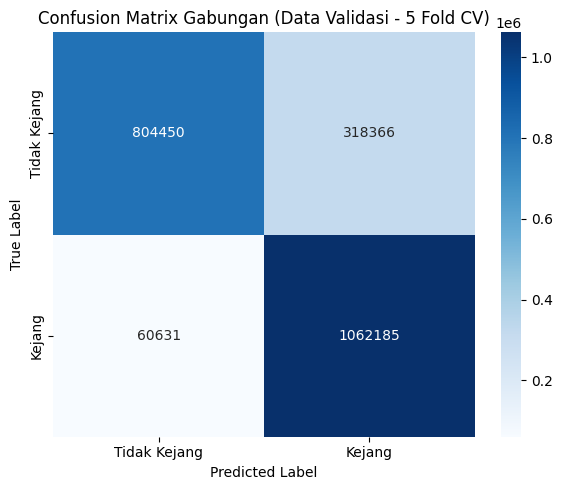


=== Evaluasi Model Terhadap Seluruh Data Latih ===
Train Accuracy : 0.8419
Precision      : 0.9476
Recall         : 0.7238
F1 Score       : 0.8207
Confusion Matrix:
[[ 812657  310159]
 [  44937 1077879]]

=== Evaluasi Akhir Model di Data Uji (20%) ===
Test Accuracy  : 0.8313
Precision      : 0.9318
Recall         : 0.7148
F1 Score       : 0.8090
Confusion Matrix:
[[200656  80048]
 [ 14687 266017]]


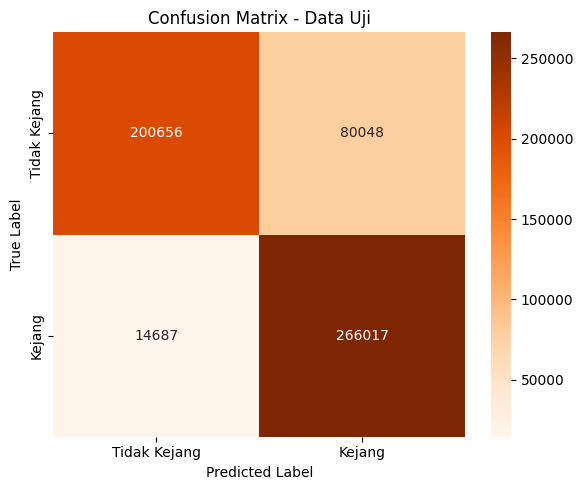


=== Confusion Matrix Gabungan (Validasi + Test Set) ===
[[1005106  398414]
 [  75318 1328202]]


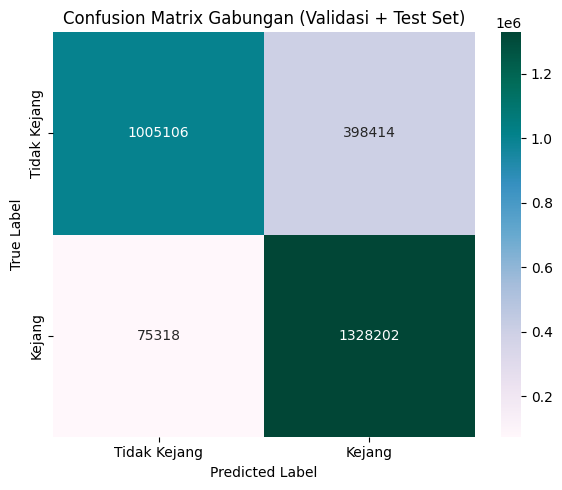

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
X = df.drop(['frekuensi', 'seizure'], axis=1)
y = df['seizure']

# 1️⃣ Split data menjadi data latih (80%) dan data uji (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Setup StratifiedKFold untuk data latih saja
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Menyimpan hasil evaluasi per fold
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

all_true_val = []
all_pred_val = []

# 3️⃣ Lakukan Cross-Validation di data latih (X_train_full)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full, y_train_full), 1):
    X_train = X_train_full.iloc[train_idx]
    X_val   = X_train_full.iloc[val_idx]
    y_train = y_train_full.iloc[train_idx]
    y_val   = y_train_full.iloc[val_idx]

    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Gabung hasil validasi untuk confusion matrix gabungan
    all_true_val.extend(y_val)
    all_pred_val.extend(y_val_pred)

    # Evaluasi per fold
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    rec = recall_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label='kejang', zero_division=0)
    cm = confusion_matrix(y_val, y_val_pred)

    # Simpan skor
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    # Print hasil per fold
    print(f"Fold {fold}:")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Val Accuracy   : {val_acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# 4️⃣ Rata-rata hasil dari 5 Fold CV (hanya dari data latih)
print("\n=== Rata-Rata Evaluasi dari 5-Fold CV (Data Latih) ===")
print(f"Mean Train Accuracy : {np.mean(train_accuracies):.4f}")
print(f"Mean Val Accuracy   : {np.mean(val_accuracies):.4f}")
print(f"Mean Precision      : {np.mean(precisions):.4f}")
print(f"Mean Recall         : {np.mean(recalls):.4f}")
print(f"Mean F1 Score       : {np.mean(f1_scores):.4f}")

# 5️⃣ Confusion Matrix Gabungan untuk semua validasi
cm_val_total = confusion_matrix(all_true_val, all_pred_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Data Validasi - 5 Fold CV)")
plt.tight_layout()
plt.show()

# 6️⃣ Evaluasi akhir model pada data uji (20%) setelah dilatih ulang dengan seluruh data latih
model.fit(X_train_full, y_train_full)
y_test_final = model.predict(X_test)

# 🔁 Evaluasi model pada seluruh data latih setelah retraining
y_train_final = model.predict(X_train_full)

train_final_acc = accuracy_score(y_train_full, y_train_final)
train_final_prec = precision_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_rec = recall_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_f1 = f1_score(y_train_full, y_train_final, pos_label='kejang', zero_division=0)
train_final_cm = confusion_matrix(y_train_full, y_train_final)

print("\n=== Evaluasi Model Terhadap Seluruh Data Latih ===")
print(f"Train Accuracy : {train_final_acc:.4f}")
print(f"Precision      : {train_final_prec:.4f}")
print(f"Recall         : {train_final_rec:.4f}")
print(f"F1 Score       : {train_final_f1:.4f}")
print(f"Confusion Matrix:\n{train_final_cm}")

final_test_acc = accuracy_score(y_test, y_test_final)
final_test_prec = precision_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_rec = recall_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_test_f1 = f1_score(y_test, y_test_final, pos_label='kejang', zero_division=0)
final_cm = confusion_matrix(y_test, y_test_final)

# Print hasil akhir test
print("\n=== Evaluasi Akhir Model di Data Uji (20%) ===")
print(f"Test Accuracy  : {final_test_acc:.4f}")
print(f"Precision      : {final_test_prec:.4f}")
print(f"Recall         : {final_test_rec:.4f}")
print(f"F1 Score       : {final_test_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")

# Visualisasi Confusion Matrix untuk Test Set
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# 7️⃣ Confusion Matrix Gabungan untuk SEMUA DATA (Validasi + Test)
all_true_total = all_true_val + list(y_test)
all_pred_total = all_pred_val + list(y_test_final)

cm_total = confusion_matrix(all_true_total, all_pred_total)
print("\n=== Confusion Matrix Gabungan (Validasi + Test Set) ===")
print(cm_total)

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Gabungan (Validasi + Test Set)")
plt.tight_layout()
plt.show()
